<h1><font size=12>
Weather Derivates </h1>
<h1> Precipitation Bogota Exploration <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
18 Julio 2018 


### Indices data Analysis

All datasets where downloaded from the Working group on Surface Pressure. 
[Link to full datasets](https://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/)

##### Southern Oscillation Index (SOI)

In [24]:
########  Southern Oscillation Index (SOI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/soi.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/soi/soi.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
soi=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/soi.dat'))),sep='  ',header=None, names=columnNames, skipfooter=1  )

soiMonth=soi.drop(columns='Anual')
soiMonth.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1866 -0.62 -0.12 -0.62 -0.65  0.04 -0.82 -0.34  0.36 -0.18  0.07  1.10 -0.16
1867  0.09 -0.01 -0.09  0.83  0.50 -0.48  0.44  0.34  0.12 -0.56 -0.65 -0.89
1868 -0.16 -0.34 -1.56  0.30 -1.34 -2.20 -0.40 -1.41 -1.23 -1.24 -1.49  0.52
1869 -1.90 -0.26 -0.59  2.12  1.40  1.53  1.42  0.94  0.12  0.85  0.56  0.42
1870  1.06  0.18 -0.75  0.47 -0.11 -1.10  0.17  0.98 -0.00 -0.58 -0.86 -1.29

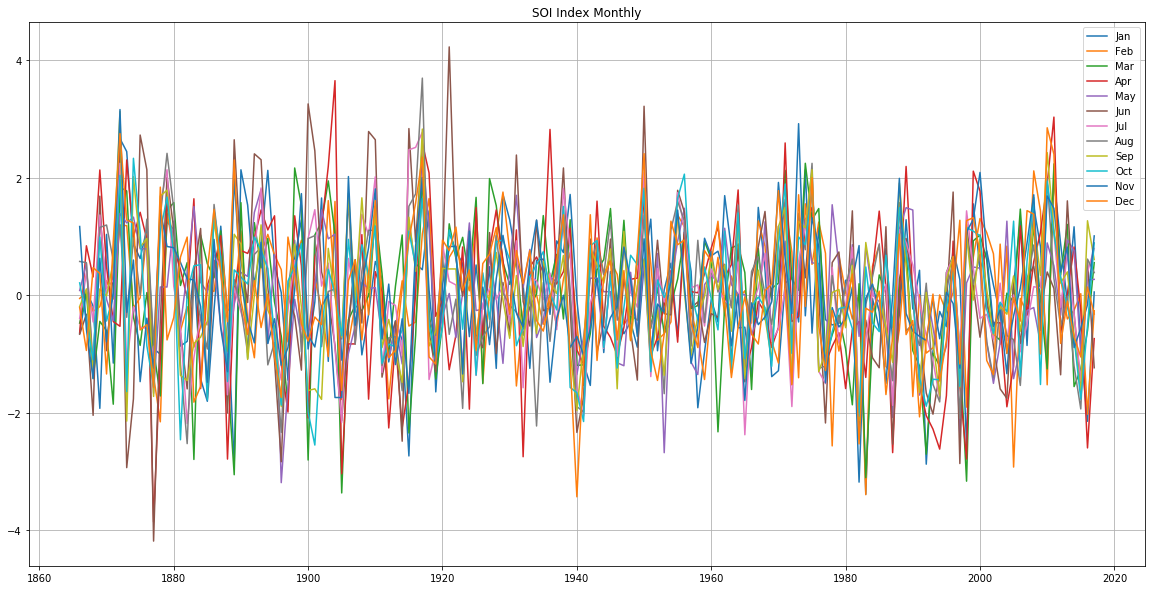

In [25]:
# Index plot removing month average. 
soiMonthAverage = soiMonth.mean()
soiReMonth = soiMonth - soiMonth.mean()
dates = pd.date_range('1866-01', periods=soiReMonth.shape[0]*soiReMonth.shape[1], freq='M')

soiReMonth.plot(figsize=(20,10),grid=True, title='SOI Index Monthly')

Text(0,0.5,'Index Value')

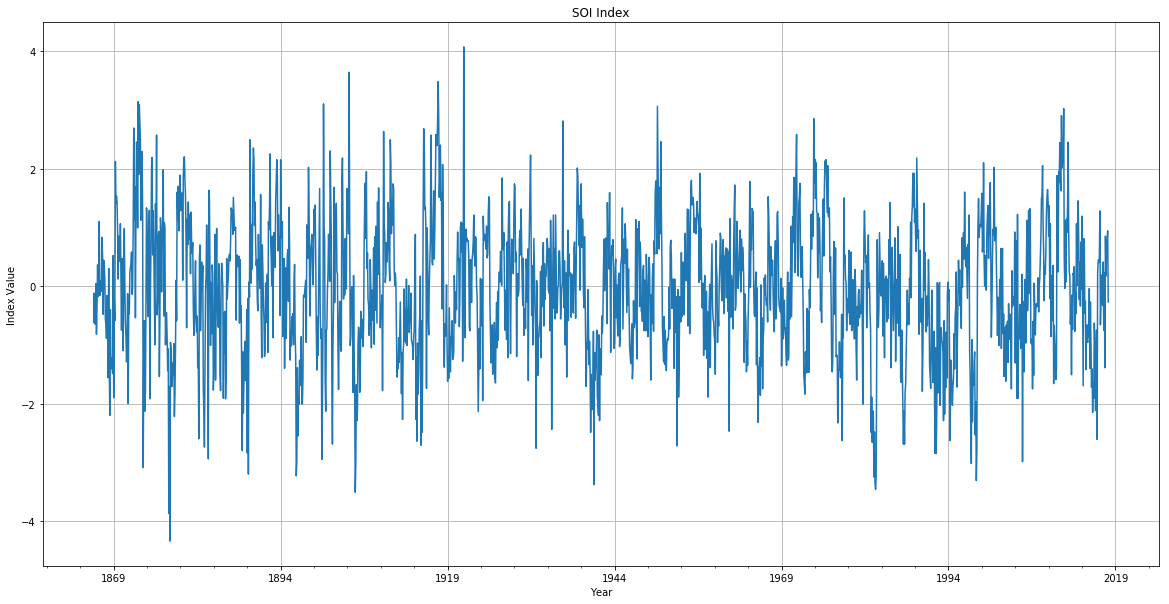

In [26]:
soiMonth.columns=range(1,13)

soiAllTime=soiMonth.stack()

soiAllTime.columns=range(1,13)
year=soiAllTime.index.get_level_values(0).values
month=soiAllTime.index.get_level_values(1).values

soiAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

soiPlotAll = soiAllTime.plot(title='SOI Index',figsize=(20,10),grid=True)

soiPlotAll.set_xlabel('Year')
soiPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

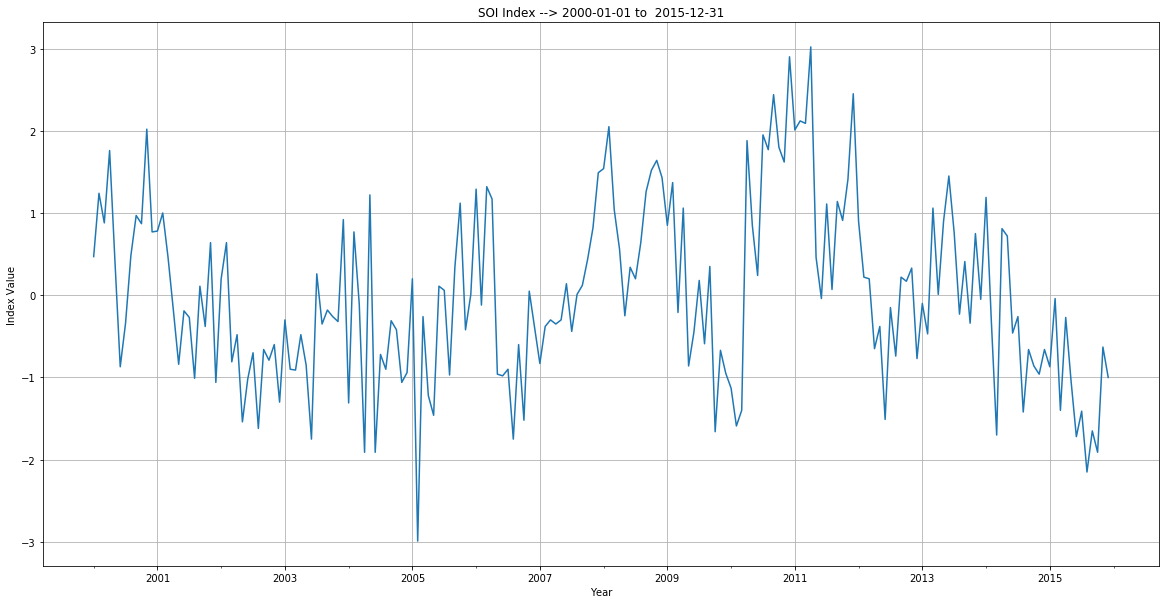

In [29]:
# Choose only last 5 years.
startDate = '2000-01-01'
endDate = '2015-12-31'

soiTime = pd.Series(soiAllTime.loc[startDate:endDate])
soiPlot=soiTime.plot(figsize=(20,10),title='SOI Index --> '+startDate+' to  ' + endDate,grid=True)
soiPlot.set_xlabel('Year')
soiPlot.set_ylabel('Index Value')

##### North Atlantic Oscillation (NAO)

In [32]:
########  North Atlantic Oscillation (NAO) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/nao.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/nao/nao.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
nao=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/nao.dat'))),sep='  ',header=None,skiprows=[0,1,2,3,4], names=columnNames, skipfooter=1,  )

naoMonth=nao.drop(columns='Anual')
naoMonth.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1826 -3.05  4.87 -0.97  1.78 -1.20  0.83  1.89  2.72 -0.76  0.18 -2.41 -0.59
1827 -0.45 -3.72  1.83 -0.83  1.20 -0.07  2.02 -3.56 -0.07 -3.02 -1.42  2.70
1828  1.27  0.37 -0.18  0.04 -1.59 -1.33 -4.40 -2.54 -2.78  0.10 -2.57  3.04
1829 -2.48  0.32 -2.54  0.12  1.80 -0.10  0.33  0.77  0.78  0.71 -0.33 -0.43
1830 -2.33  1.20  3.58  3.08 -0.05 -0.85  3.19 -0.35  2.04  2.04  2.19 -3.13

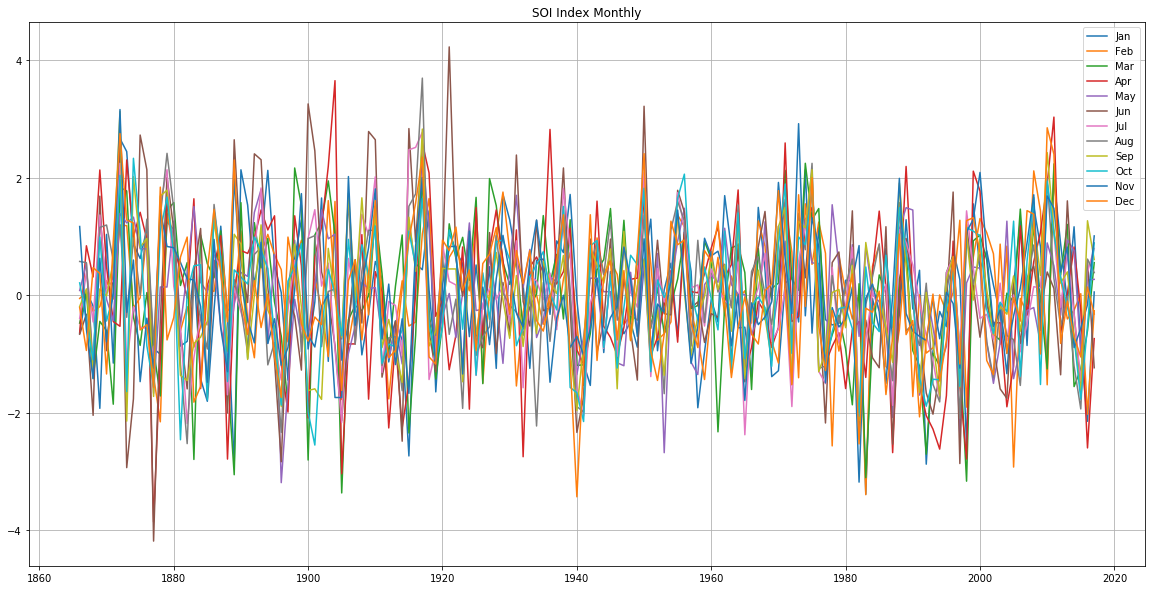

In [33]:
# Index plot removing month average. 
naoMonthAverage = naoMonth.mean()
naoReMonth = naoMonth - naoMonth.mean()
datesNao = pd.date_range('1826-01', periods=naoReMonth.shape[0]*naoReMonth.shape[1], freq='M')

soiReMonth.plot(figsize=(20,10),grid=True, title='SOI Index Monthly')

Text(0,0.5,'Index Value')

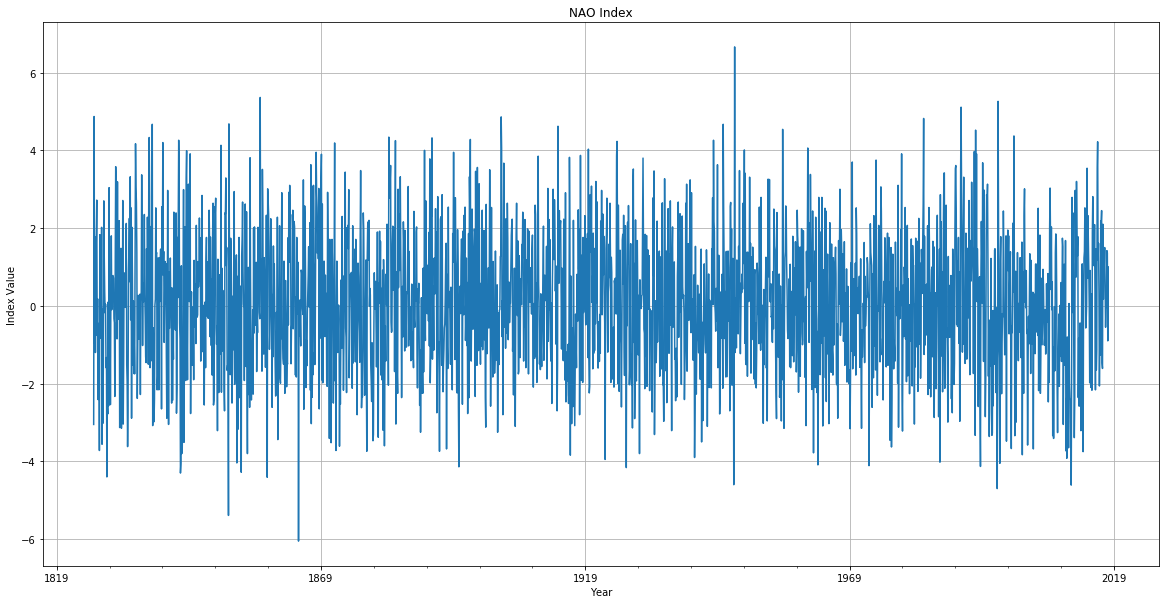

In [34]:
naoMonth.columns=range(1,13)

naoAllTime=naoMonth.stack()

naoAllTime.columns=range(1,13)
year=naoAllTime.index.get_level_values(0).values
month=naoAllTime.index.get_level_values(1).values

naoAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

naoPlotAll= naoAllTime.plot(title='NAO Index',figsize=(20,10),grid=True)

naoPlotAll.set_xlabel('Year')
naoPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

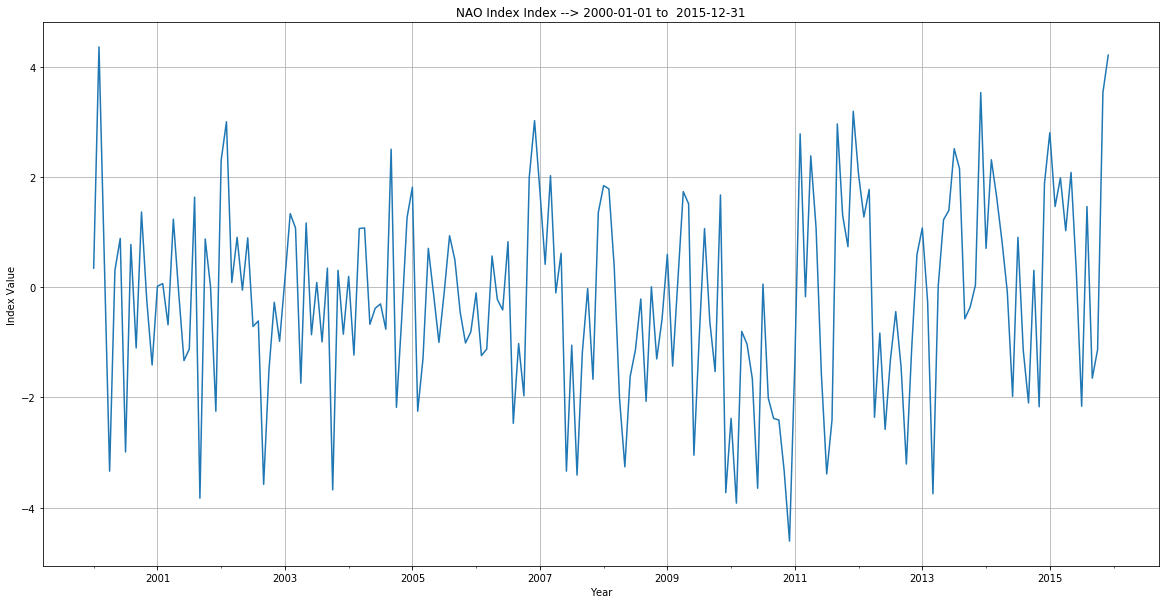

In [40]:
# Choose only last 5 years.

naoTime = pd.Series(naoAllTime.loc[startDate:endDate])

naoPlot = naoTime.plot(figsize=(20,10),title='NAO Index Index --> '+startDate+' to  ' + endDate,grid=True)

naoPlot.set_xlabel('Year')
naoPlot.set_ylabel('Index Value')

##### Niño 3.4 Index (Nino34)

In [36]:
########  Southern Oscillation Index (SOI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/nino34.dat'):
    ! wget https://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino34.long.anom.data -O ../datasets/nino34.dat

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
nino34=pd.read_csv(StringIO(''.join(l.replace('    ', '   ') for l in open('../datasets/nino34.dat'))),sep='   ',header=None,skiprows=[0], names=columnNames, skipfooter=8,  )
nino34Month=nino34
nino34Month.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1870 -1.00 -1.20 -0.83 -0.81 -1.27 -1.08 -1.04 -0.88 -0.53 -0.92 -0.79 -0.79
1871 -0.25 -0.58 -0.43 -0.50 -0.70 -0.53 -0.60 -0.33 -0.24 -0.33 -0.31 -0.58
1872 -0.72 -0.62 -0.50 -0.77 -0.62 -0.52 -0.32 -0.85 -1.02 -0.94 -0.79 -0.88
1873 -0.78 -1.01 -1.31 -0.67 -0.53 -0.48 -0.58 -0.39 -0.34 -0.78 -0.77 -0.70
1874 -0.93 -1.06 -1.40 -0.94 -0.86 -0.72 -1.00 -1.05 -1.13 -1.25 -1.33 -1.14

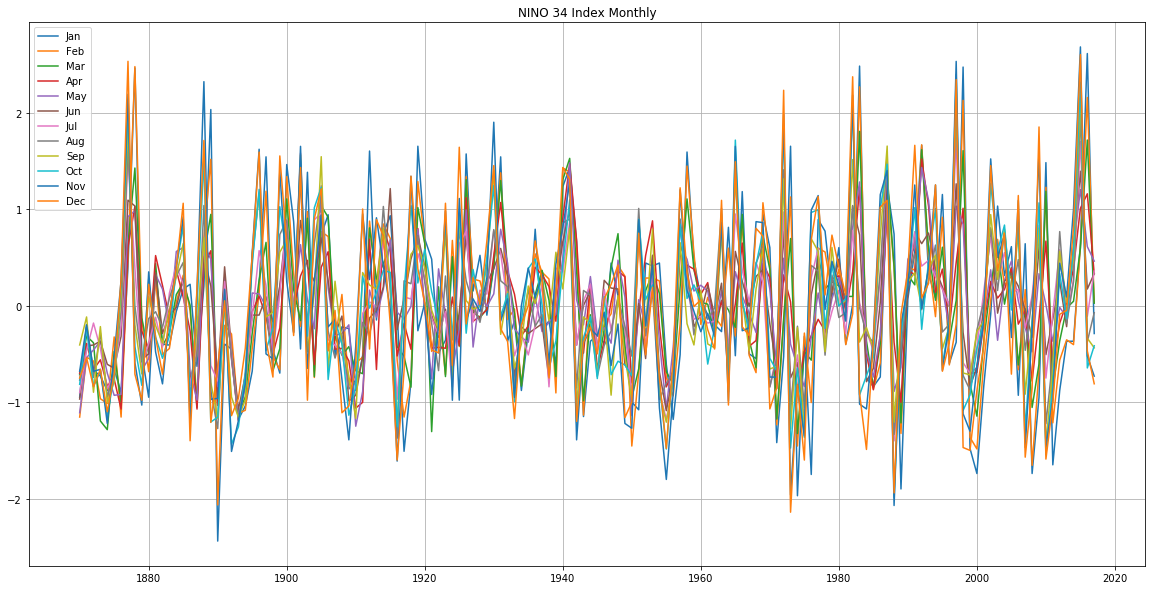

In [37]:
# Index plot removing month average. 
nino34MonthAverage = nino34Month.mean()
nino34ReMonth = nino34Month - nino34Month.mean()
datesNino34 = pd.date_range('1870-01', periods=nino34ReMonth.shape[0]*nino34ReMonth.shape[1], freq='M')

nino34ReMonth.plot(figsize=(20,10),grid=True, title='NINO 34 Index Monthly')

Text(0,0.5,'Index Value')

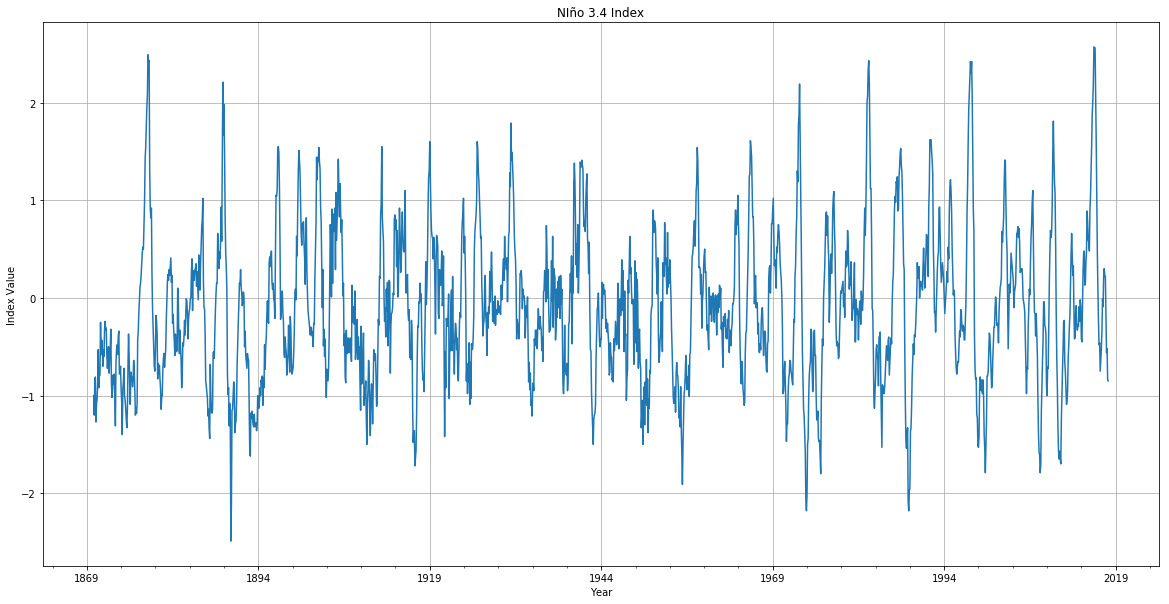

In [38]:
nino34Month.columns=range(1,13)

nino34AllTime=nino34Month.stack()

nino34AllTime.columns=range(1,13)
year=nino34AllTime.index.get_level_values(0).values
month=nino34AllTime.index.get_level_values(1).values

nino34AllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

nino34PlotAll = nino34AllTime.plot(title='NIño 3.4 Index',figsize=(20,10),grid=True)

nino34PlotAll.set_xlabel('Year')
nino34PlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

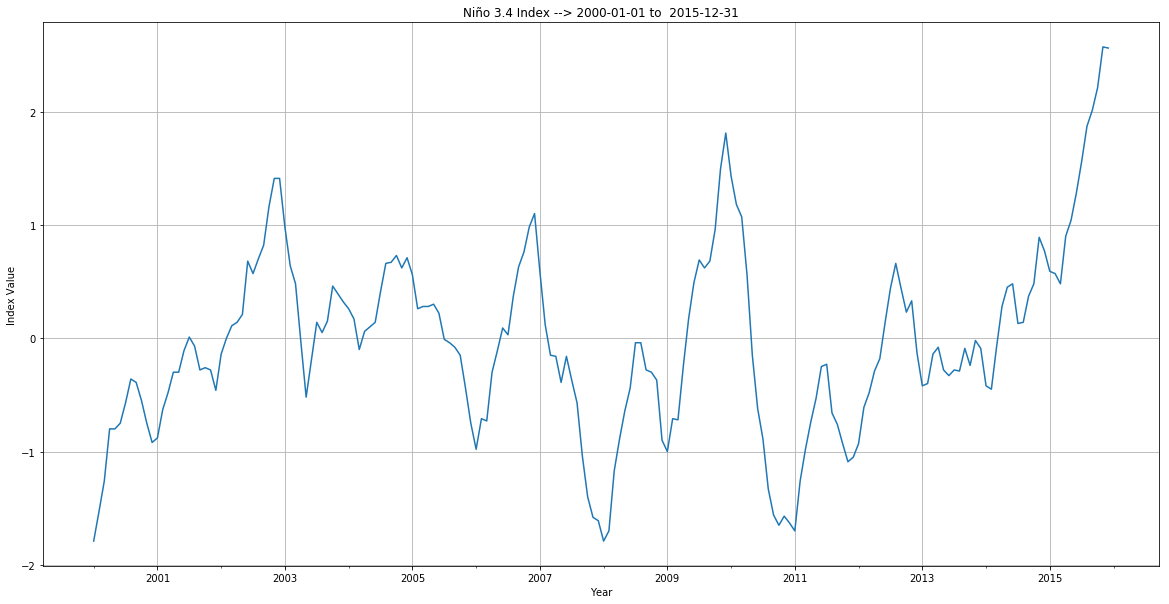

In [41]:
# Choose only last 5 years.
nino34Time = pd.Series(nino34AllTime.loc[startDate:endDate])
nino34Plot=nino34Time.plot(figsize=(20,10),title='Niño 3.4 Index --> '+startDate+' to  ' + endDate,grid=True)
nino34Plot.set_xlabel('Year')
nino34Plot.set_ylabel('Index Value')

##### ONI Index 

In [42]:
########  Southern Oscillation Index (ONI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/oni.dat'):
    ! wget https://www.esrl.noaa.gov/psd/data/correlation/oni.data -O ../datasets/oni.dat

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
oni=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/oni.dat'))),sep='  ',header=None,skiprows=[0], names=columnNames, skipfooter=9  )
oniMonth=oni
oniMonth.tail()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2013 -0.38 -0.33 -0.24 -0.21 -0.27 -0.34 -0.38 -0.35 -0.31 -0.23 -0.22 -0.27
2014 -0.37 -0.36 -0.17  0.13  0.30  0.23  0.07  0.03  0.18  0.44  0.59  0.66
2015  0.60  0.56  0.62  0.79  1.02  1.25  1.54  1.83  2.11  2.37  2.53  2.64
2016  2.53  2.23  1.68  1.03  0.48 -0.00 -0.34 -0.57 -0.68 -0.74 -0.71 -0.56
2017 -0.29 -0.06  0.15  0.29  0.39  0.38  0.16 -0.14 -0.44 -0.70 -0.88 -0.97

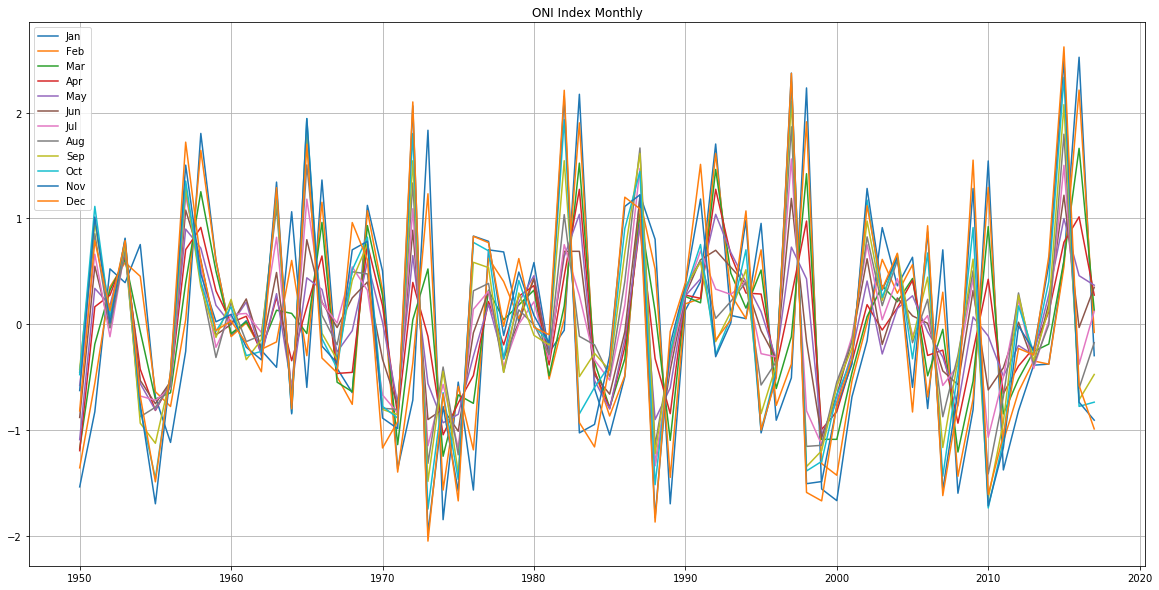

In [43]:
# Index plot removing month average. 
oniMonthAverage = oniMonth.mean()
oniReMonth = oniMonth - oniMonth.mean()
datesOni = pd.date_range('1870-01', periods=oniReMonth.shape[0]*oniReMonth.shape[1], freq='M')

oniReMonth.plot(figsize=(20,10),grid=True, title='ONI Index Monthly')

Text(0,0.5,'Index Value')

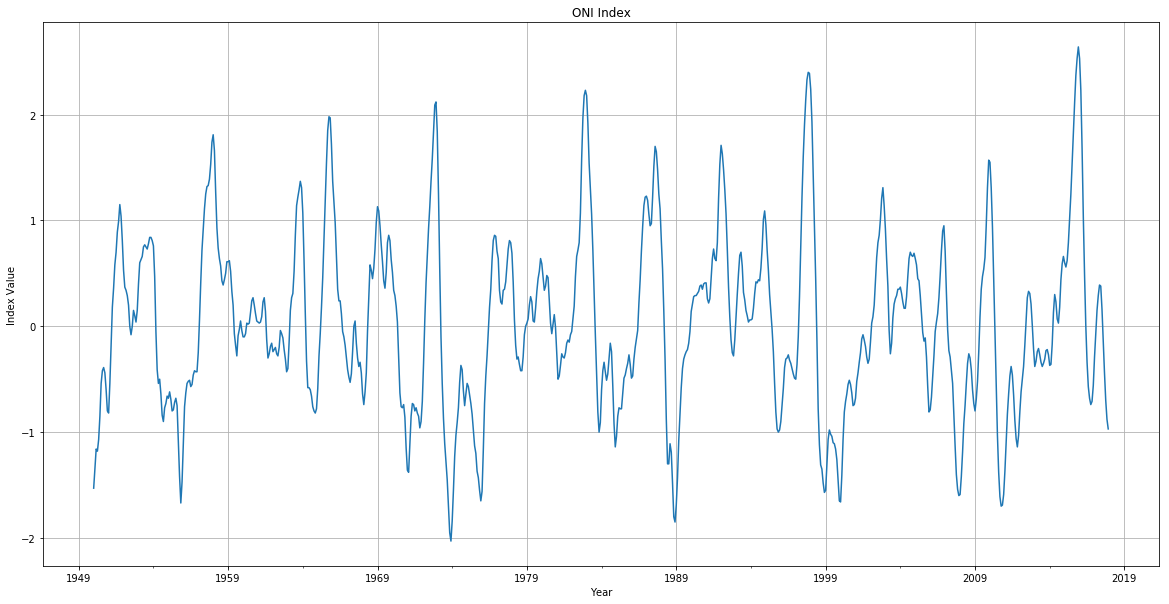

In [44]:
oniMonth.columns=range(1,13)

oniAllTime=oniMonth.stack()

year=oniAllTime.index.get_level_values(0).values
month=oniAllTime.index.get_level_values(1).values

oniAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

oniPlotAll = oniAllTime.plot(title='ONI Index',figsize=(20,10),grid=True)

oniPlotAll.set_xlabel('Year')
oniPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

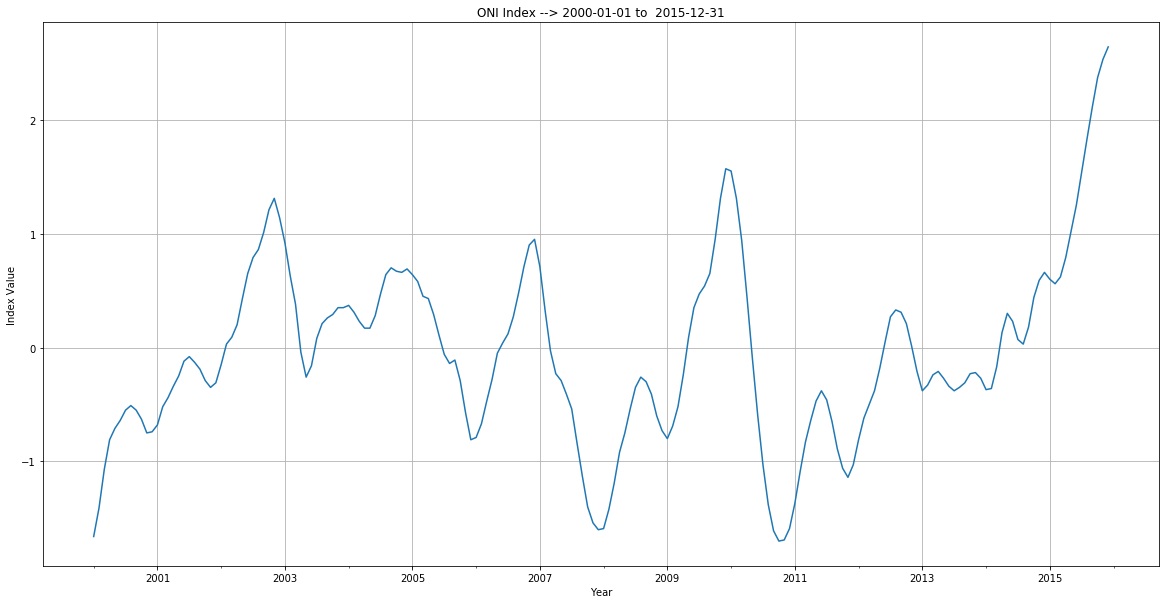

In [45]:
# Choose only last 5 years.
oniTime = pd.Series(oniAllTime.loc[startDate:endDate])
oniPlot=oniTime.plot(figsize=(20,10),title='ONI Index --> '+startDate+' to  ' + endDate,grid=True)
oniPlot.set_xlabel('Year')
oniPlot.set_ylabel('Index Value')



## Rainfall Data Analysis

In [47]:
# Download the update dataset.
import os
if not os.path.exists('../datasets/pr_1901_2015.xls'):
    ! wget http://sdwebx.worldbank.org/climateportal/DownloadData/pr_1901_2015.xls -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
worldBank=pd.read_excel('../datasets/pr_1901_2015.xls',index_col=1)

worldBank.head()


Populating the interactive namespace from numpy and matplotlib


pr   Month  Country   ISO3   ISO2
\tYear                                         
1901     92.5029       1      COL    NaN    NaN
1901    108.6280       2      COL    NaN    NaN
1901    159.7820       3      COL    NaN    NaN
1901    204.2990       4      COL    NaN    NaN
1901    283.6320       5      COL    NaN    NaN

In [48]:
print(worldBank.columns)

worldBankMonth=worldBank.drop(columns=[' Country',' ISO3',' ISO2'])

datesWorldBank = pd.date_range('1901-01', periods=worldBank.shape[0], freq='M')

worldBankAllTime= pd.Series(np.asarray(worldBankMonth['pr']),index=datesWorldBank) 


Index(['pr', ' Month', ' Country', ' ISO3', ' ISO2'], dtype='object')


Text(0,0.5,'Precipitation Amount (mm)')

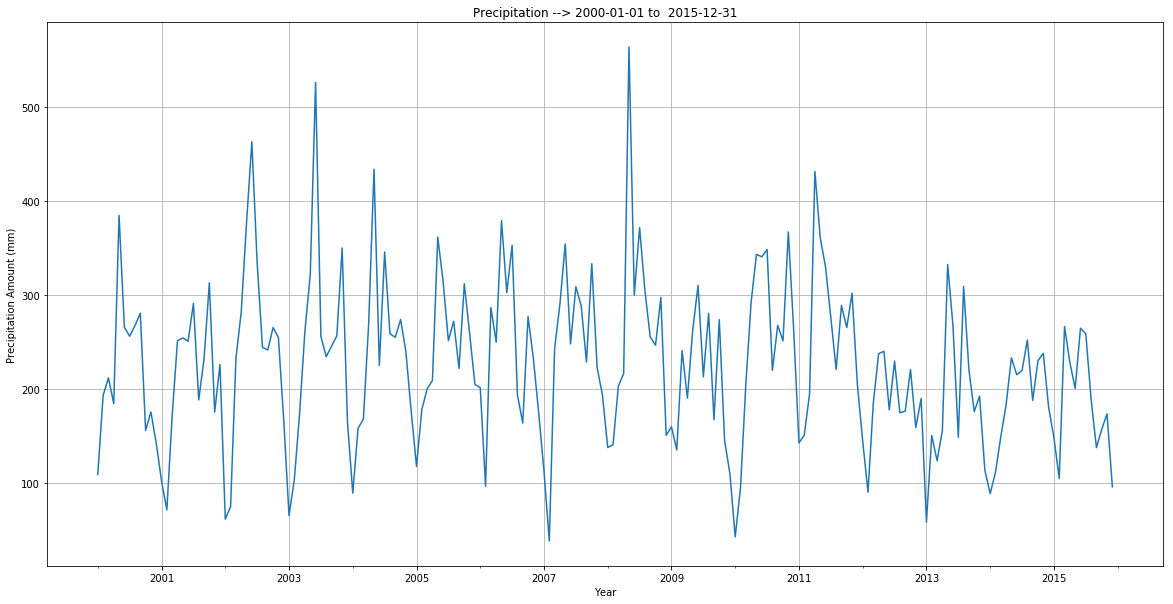

In [50]:
# Choose only 5 last years values.


worldBankTime = pd.Series(worldBankAllTime.loc[startDate:endDate])

worldBankPlot = worldBankTime.plot(figsize=(20,10),title='Precipitation --> '+startDate+' to  ' + endDate ,grid=True)

worldBankPlot.set_xlabel('Year')
worldBankPlot.set_ylabel('Precipitation Amount (mm)')

## Contrasting precipitation with Climate Indices

Text(0,0.5,'Index Value')

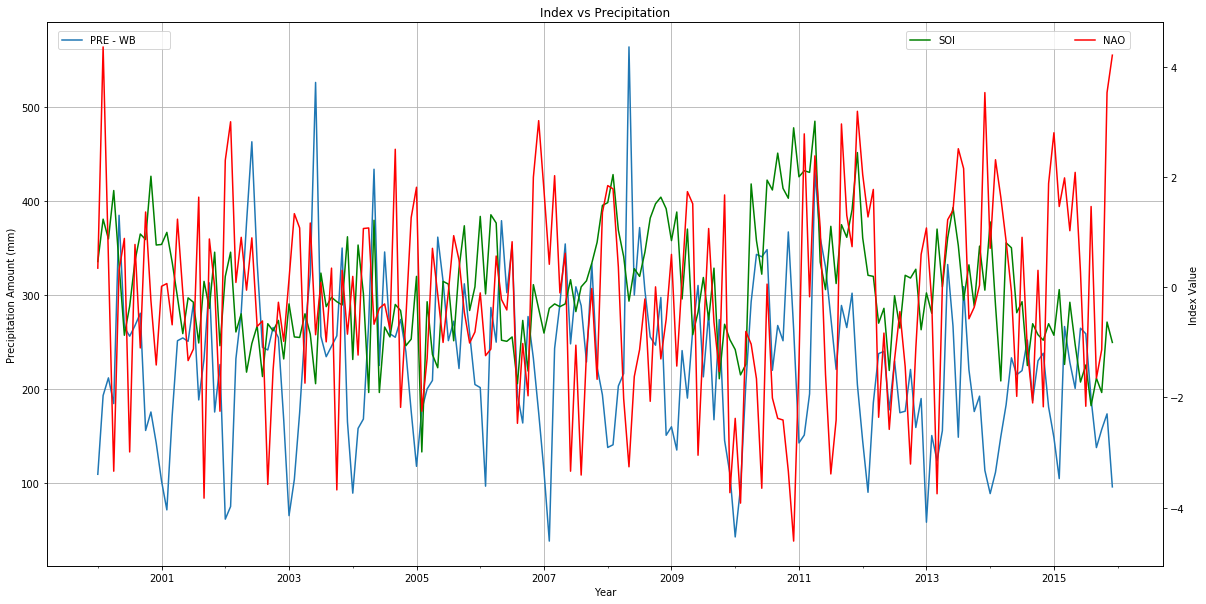

In [51]:
ax1=worldBankTime.plot(figsize=(20,10),label='PRE - WB',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.1, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

soiTime.plot(ax=ax2,color='green',label='SOI')
plt.legend(bbox_to_anchor=(0.1, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
naoTime.plot(ax=ax2,color='red',label='NAO')

plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

## Ideam Data - Aeropuerto Guaymaral

In [52]:

# Download the update dataset.
import os
if not os.path.exists('../datasets/Precipitacion_Totales_Mensuales.csv'):
    ! wget https://www.datos.gov.co/api/views/mb4n-6m2g/rows.csv -O ../datasets/Precipitacion_Totales_Mensuales.csv 

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
ideamPre=pd.read_csv('../datasets/Precipitacion_Totales_Mensuales.csv')

ideamEstacion = ideamPre.loc[ideamPre['ESTACIÓN']=='Apto Gaymaral']

print(ideamEstacion.columns)
ideamEstacion.drop(['CÓDIGO','X=N','Y=E','MUNICIPIO','CUENCA','ESTACIÓN'],axis=1,inplace=True)
ideamEstacion.set_index('AÑO',drop=True,inplace=True)
ideamEstacion.head(10)

Populating the interactive namespace from numpy and matplotlib
Index(['ESTACIÓN', 'CÓDIGO', 'X=N', 'Y=E', 'MUNICIPIO', 'CUENCA', 'AÑO',
       'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype='object')


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


ENERO  FEBRERO  MARZO  ABRIL   MAYO  JUNIO  JULIO  AGOSTO  SEPTIEMBRE  \
AÑO                                                                           
1965    0.0      0.0    0.0    0.0    0.0    0.0    0.0     3.2        14.5   
1966   11.5     26.3   73.8   63.6   87.2   84.0   45.6    80.2        84.6   
1967   37.2     64.3   72.9   91.7   79.5  110.1   89.0    39.0        23.9   
1968   14.8     55.5   21.1  155.3   94.2   91.7   41.3    16.2        95.5   
1969   55.1     24.7   36.1  145.5  100.9  101.0   30.0    50.3        89.4   
1970   27.3     55.2   14.6   44.0   86.2   39.3   38.6    30.1        81.5   
1971   46.0     57.1  104.4  169.4   80.8   49.9   40.5    78.6       100.6   
1972   76.4     35.2   76.0  192.6  191.0  116.0   28.0    17.0        15.0   
1973    1.0      0.0   82.0   66.7   50.4   48.9   54.3    58.4       149.5   
1974   48.0     48.1   36.6   85.8  113.0   17.0   30.0    35.0        92.5   

      OCTUBRE  NOVIEMBRE  DICIEMBRE  
AÑO                                  
1965    116.9      124.7       67.9  
1966     70.0      183.7       71.7  
1967     62.1      104.8       25.6  
1968     91.8       71.7       16.5  
1969    174.2       94.2       35.6  
1970    155.1      109.0       31.4  
1971     69.6      105.6       72.3  
1972     37.0      127.0        9.0  
1973    100.0       69.8       90.6  
1974     72.4      105.0       28.3

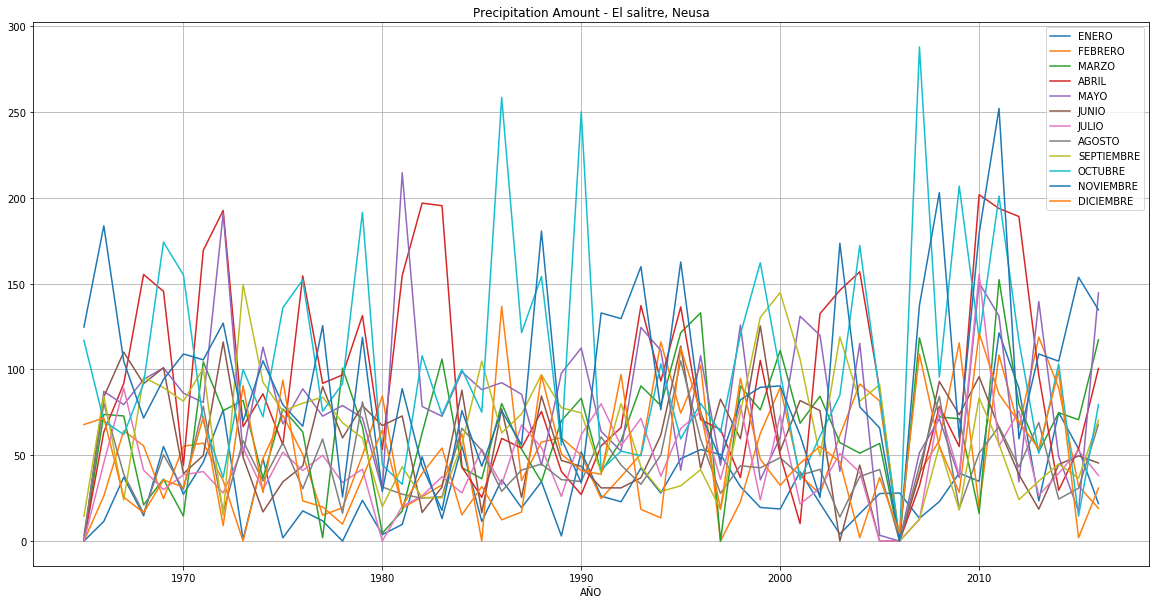

In [53]:
datesIdeamEstacion = pd.date_range('1965-01', periods=ideamEstacion.shape[0]*ideamEstacion.shape[1], freq='M')
ideamEstacion.plot(figsize=(20,10),title='Precipitation Amount - El salitre, Neusa',grid=True)

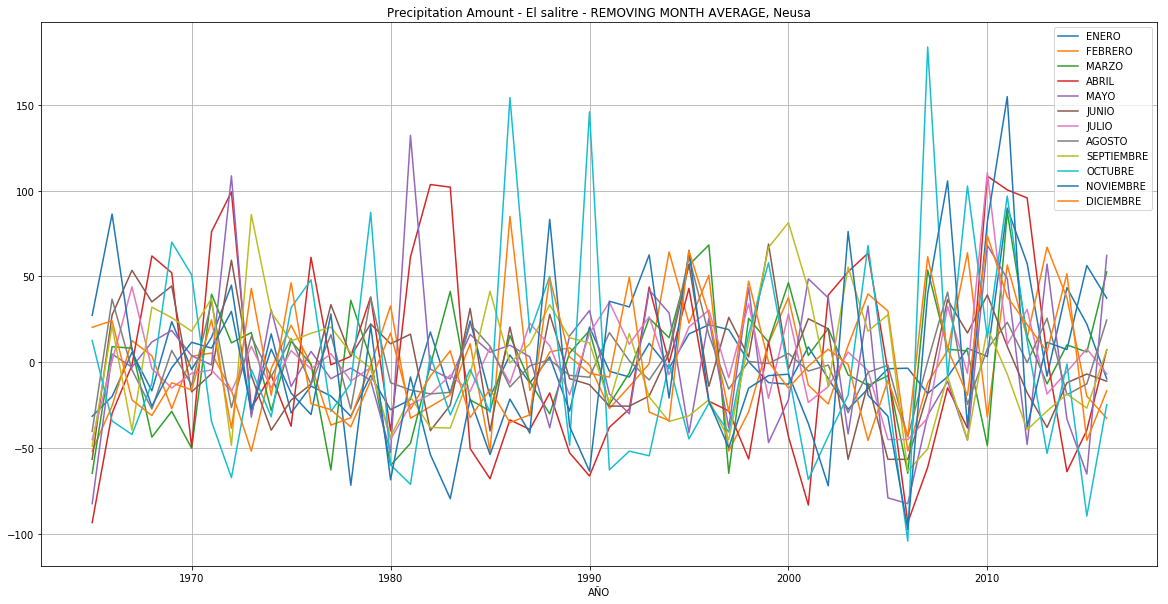

In [54]:
# Index plot removing month average. 
ideamEstacionRe = ideamEstacion - ideamEstacion.mean()
ideamEstacionRe.plot(figsize=(20,10),title='Precipitation Amount - El salitre - REMOVING MONTH AVERAGE, Neusa',grid=True)

Text(0,0.5,'Amount (mm)')

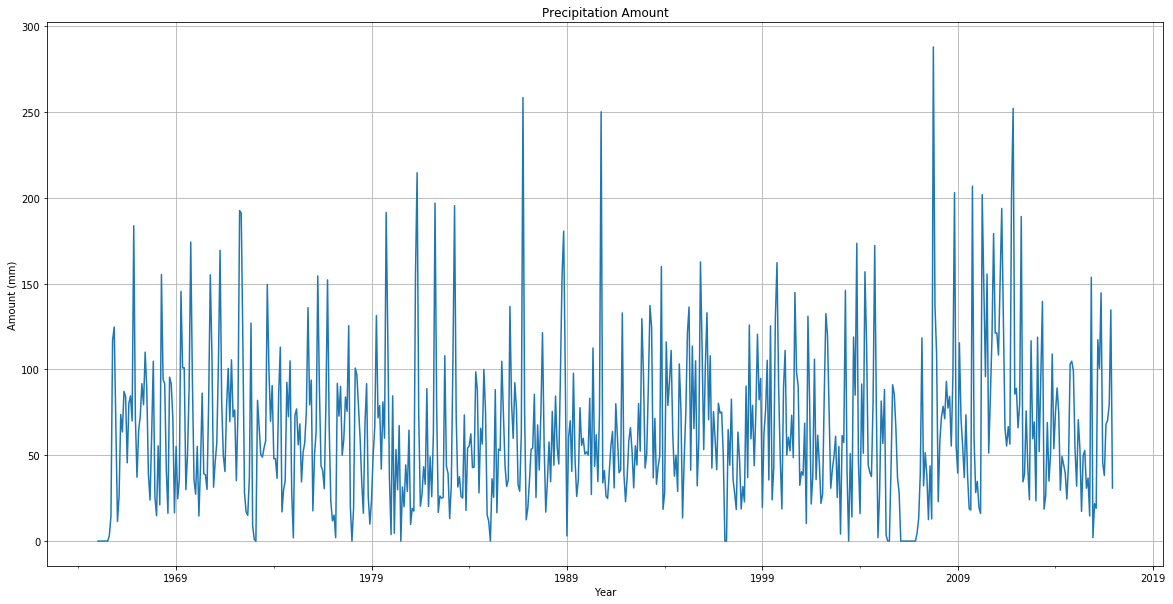

In [55]:
# Data without removing month average.

ideamEstacion.columns=range(1,13)

ideamEstacionAllTime=ideamEstacion.stack()

ideamEstacionAllTime.columns=range(1,13)
year=ideamEstacionAllTime.index.get_level_values(0).values
month=ideamEstacionAllTime.index.get_level_values(1).values

ideamEstacionAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

ideamEstacionPlotAll= ideamEstacionAllTime.plot(title='Precipitation Amount',figsize=(20,10),grid=True)

ideamEstacionPlotAll.set_xlabel('Year')
ideamEstacionPlotAll.set_ylabel('Amount (mm)')

Text(0,0.5,'Amount (mm)')

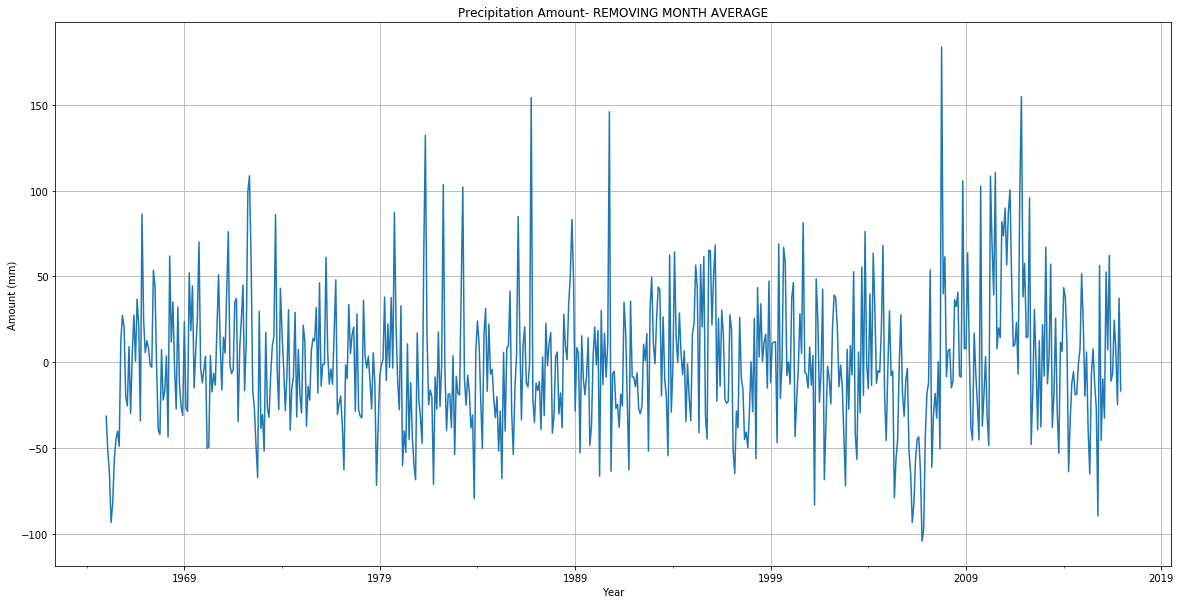

In [56]:
# Data REMOVING month average.

ideamEstacionRe.columns=range(1,13)

ideamEstacionReAllTime=ideamEstacionRe.stack()

ideamEstacionReAllTime.columns=range(1,13)
year=ideamEstacionReAllTime.index.get_level_values(0).values
month=ideamEstacionReAllTime.index.get_level_values(1).values

ideamEstacionReAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

ideamEstacionRePlotAll= ideamEstacionReAllTime.plot(title='Precipitation Amount- REMOVING MONTH AVERAGE',figsize=(20,10),grid=True)

ideamEstacionRePlotAll.set_xlabel('Year')
ideamEstacionRePlotAll.set_ylabel('Amount (mm)')

Text(0,0.5,'Amount (mm)')

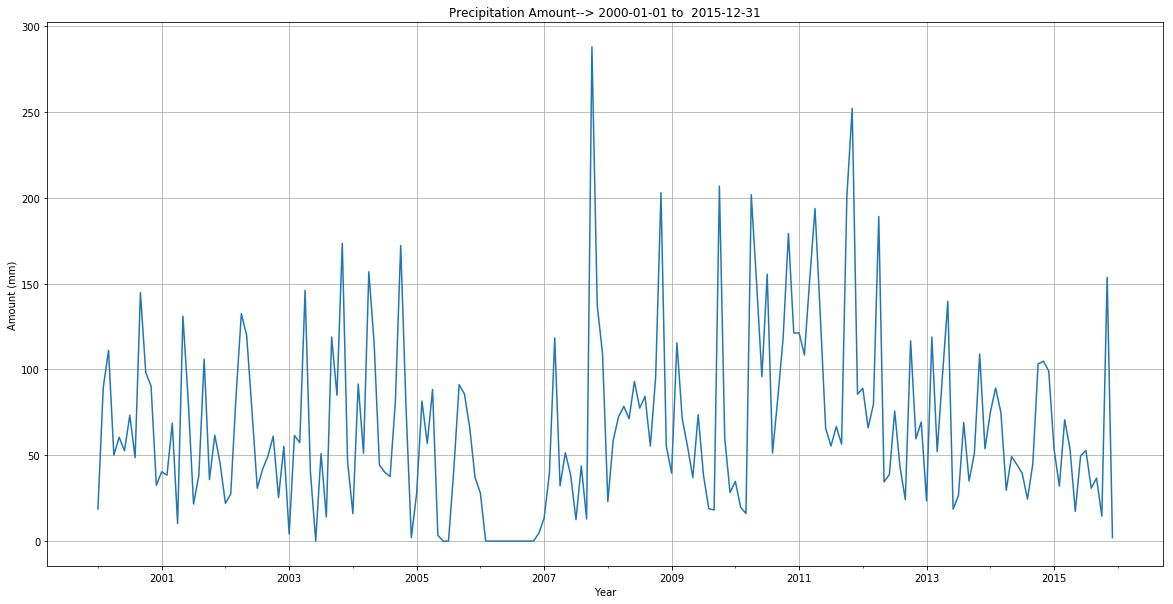

In [57]:
# Choose only last 5 years.
ideamEstacionTime = pd.Series(ideamEstacionAllTime.loc[startDate:endDate])
ideamEstacionPlot=ideamEstacionTime.plot(figsize=(20,10),title='Precipitation Amount--> '+startDate+' to  ' + endDate, grid=True)
ideamEstacionPlot.set_xlabel('Year')
ideamEstacionPlot.set_ylabel('Amount (mm)')




### Contrasting Guaymaral Values with ENSO Indices

Text(0,0.5,'Index Value')

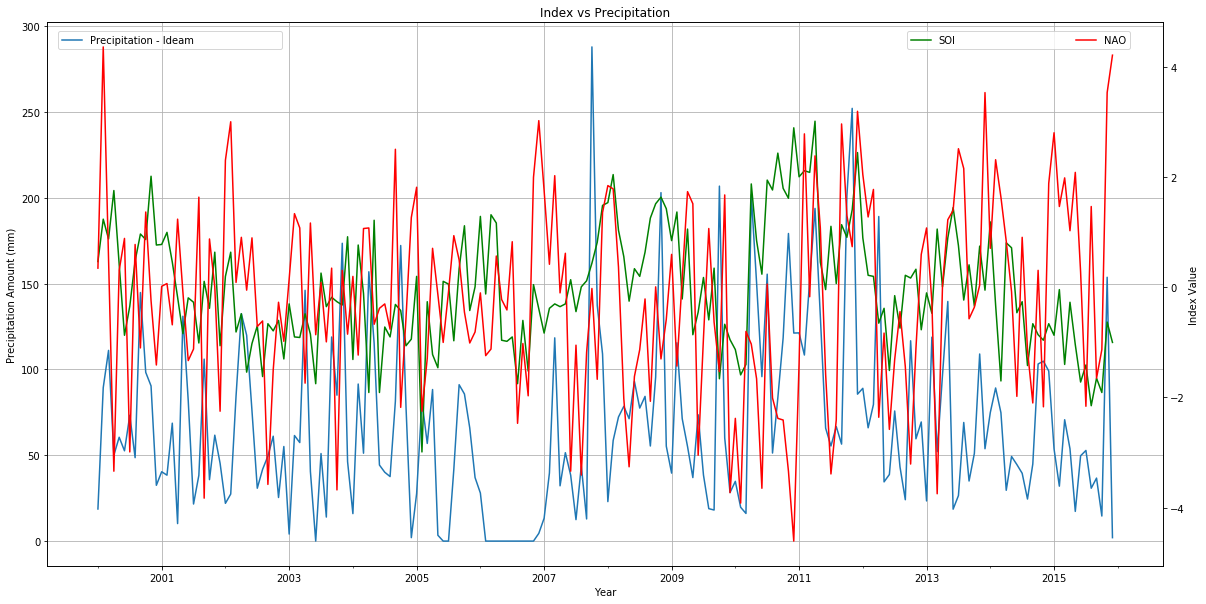

In [58]:
ax1=ideamEstacionTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

soiTime.plot(ax=ax2,color='green',label='SOI')
plt.legend(bbox_to_anchor=(0.1, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
naoTime.plot(ax=ax2,color='red',label='NAO')

plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

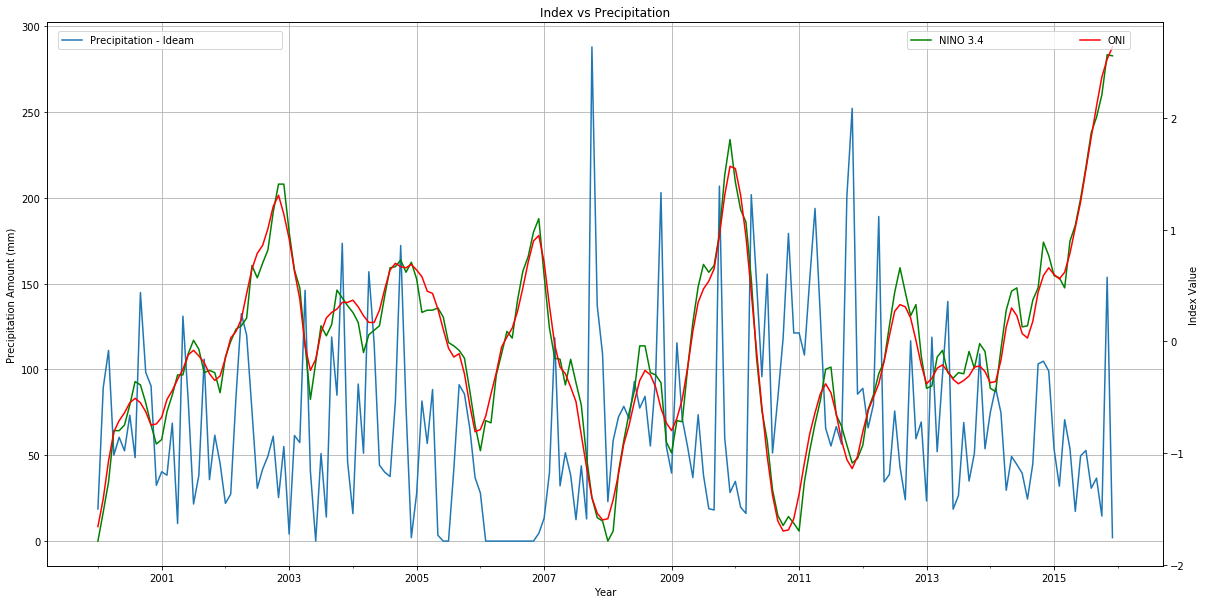

In [59]:
ax1=ideamEstacionTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

nino34Time.plot(ax=ax2,color='green',label='NINO 3.4')
plt.legend(bbox_to_anchor=(0.9, 0.95, 0.1, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

oniTime.plot(ax=ax2,color='red',label='ONI')
plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

# Dispersion Plots $\rightarrow$ ****REMOVING MONTH AVERAGE****


## SOI + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

The correlation matrix is:

  [[1.         0.22917947]
 [0.22917947 1.        ]]


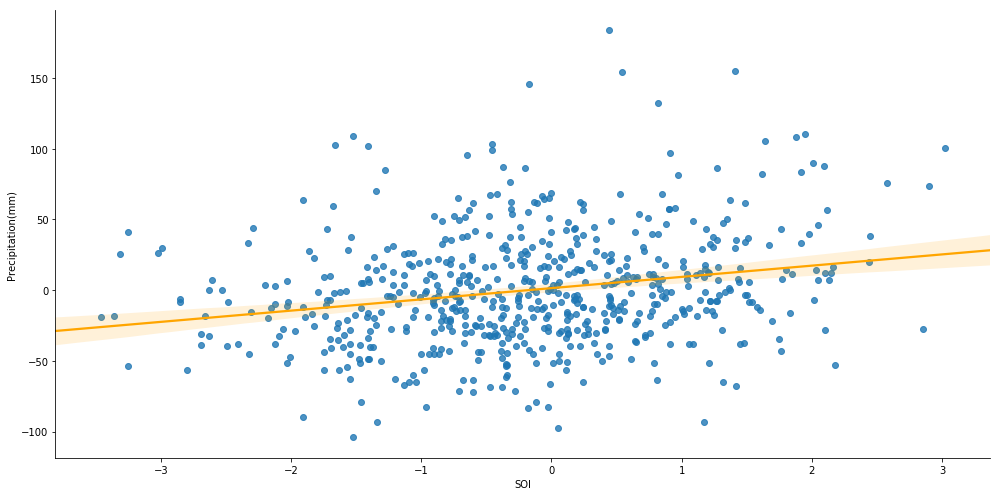

In [82]:
import seaborn as sns


soiIdeamMix = pd.concat([soiAllTime,ideamEstacionReAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-1}$

The correlation matrix is:

  [[1.         0.24436004]
 [0.24436004 1.        ]]


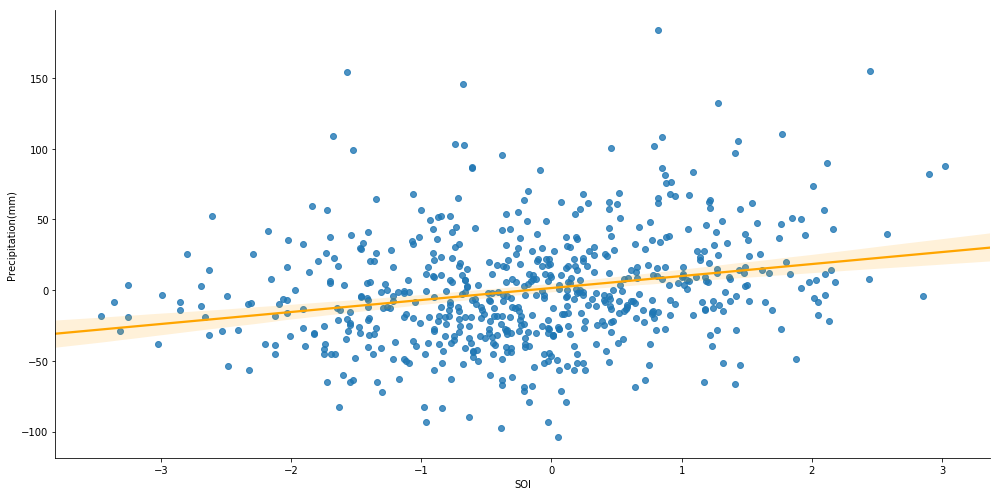

In [83]:
soiIdeamMix = pd.concat([soiAllTime.shift(-1),ideamEstacionReAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-2}$

The correlation matrix is:

  [[1.         0.21381167]
 [0.21381167 1.        ]]


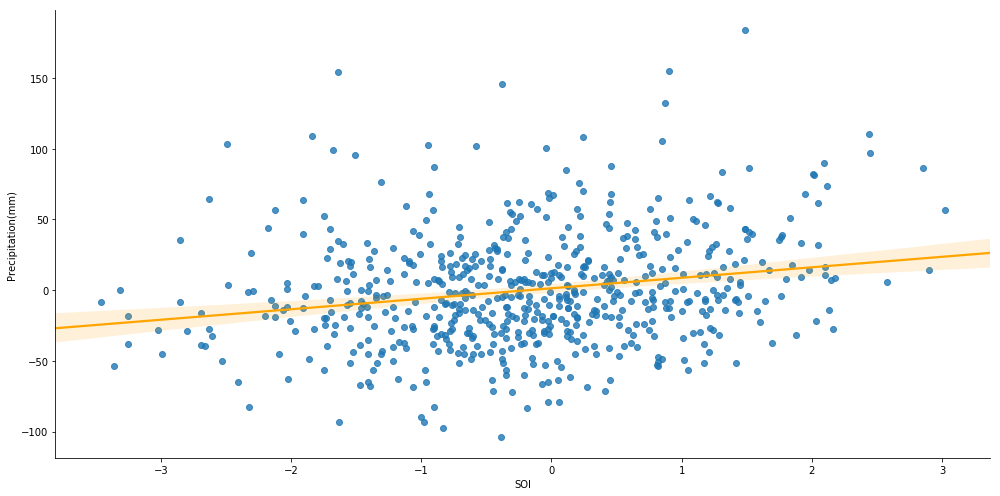

In [84]:
soiIdeamMix = pd.concat([soiAllTime.shift(-2),ideamEstacionReAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2 ,line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-3}$

The correlation matrix is:

  [[1.         0.19626484]
 [0.19626484 1.        ]]


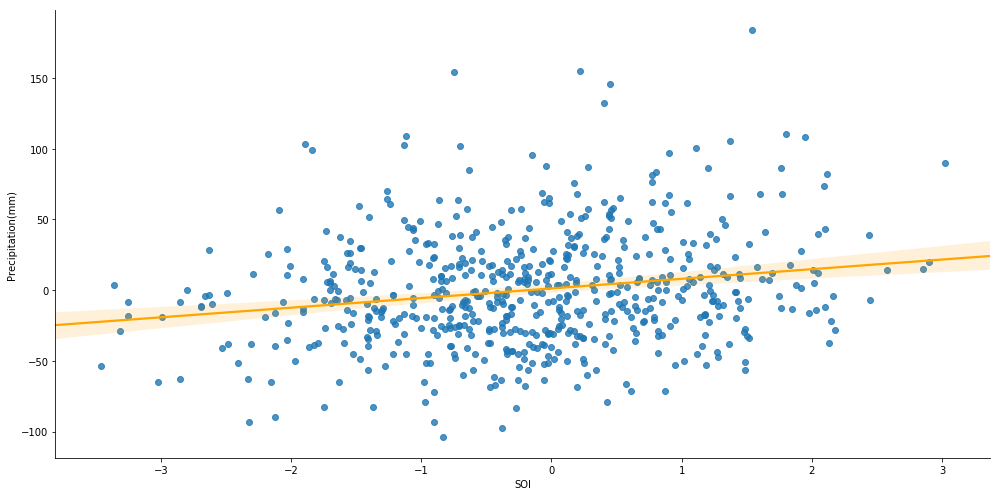

In [85]:
soiIdeamMix = pd.concat([soiAllTime.shift(-3),ideamEstacionReAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

## NAO + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

The correlation matrix is:

 [[ 1.         -0.02399762]
 [-0.02399762  1.        ]]


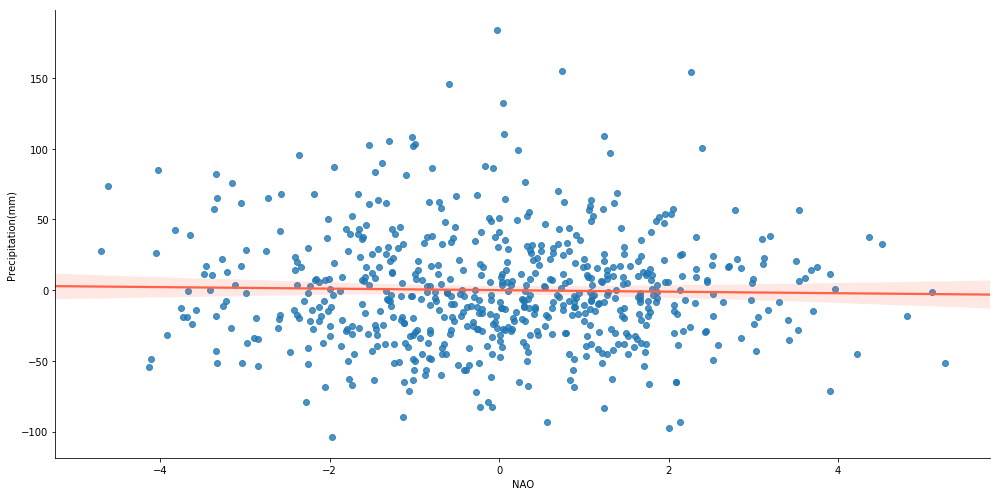

In [86]:
naoIdeamMix = pd.concat([naoAllTime,ideamEstacionReAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-1}$

The correlation matrix is:

 [[1.         0.04817419]
 [0.04817419 1.        ]]


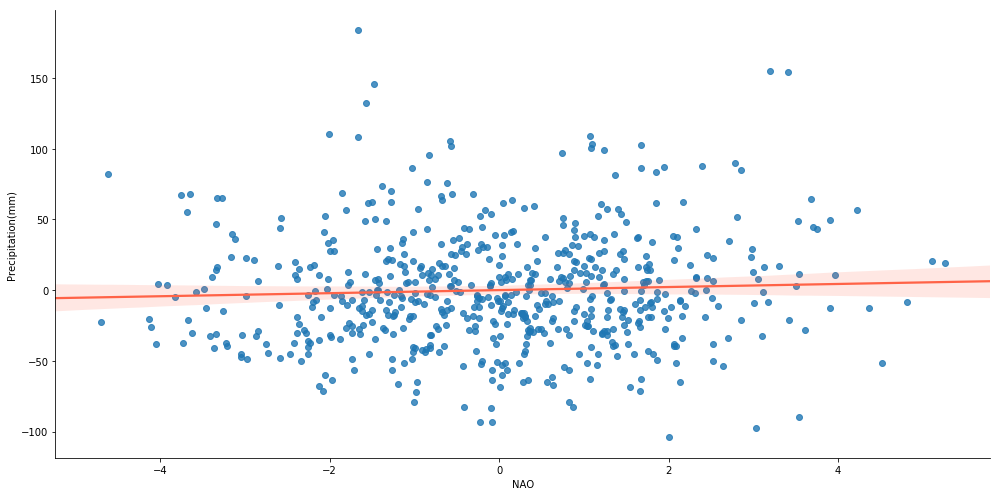

In [87]:
naoIdeamMix = pd.concat([naoAllTime.shift(-1),ideamEstacionReAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-2}$

The correlation matrix is:

 [[1.         0.02668932]
 [0.02668932 1.        ]]


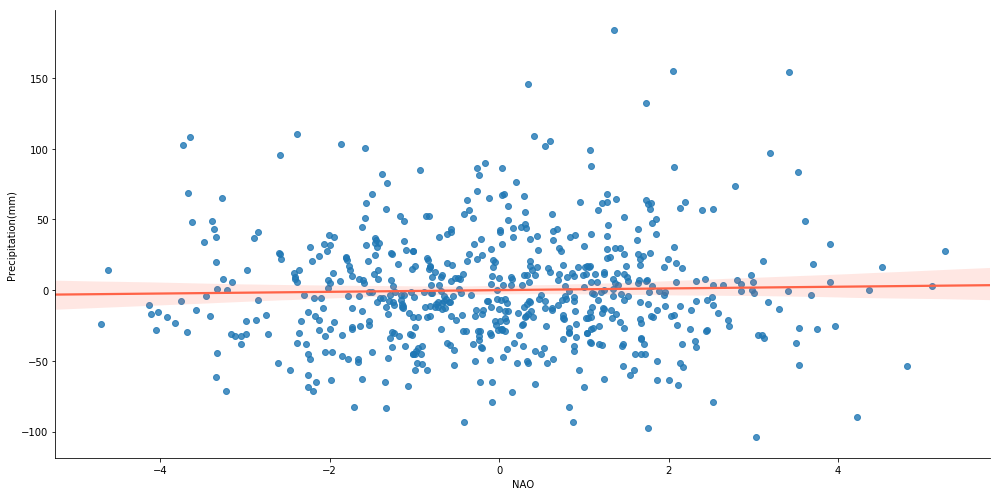

In [88]:
naoIdeamMix = pd.concat([naoAllTime.shift(-2),ideamEstacionReAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-3}$

The correlation matrix is:

 [[ 1.         -0.03613222]
 [-0.03613222  1.        ]]


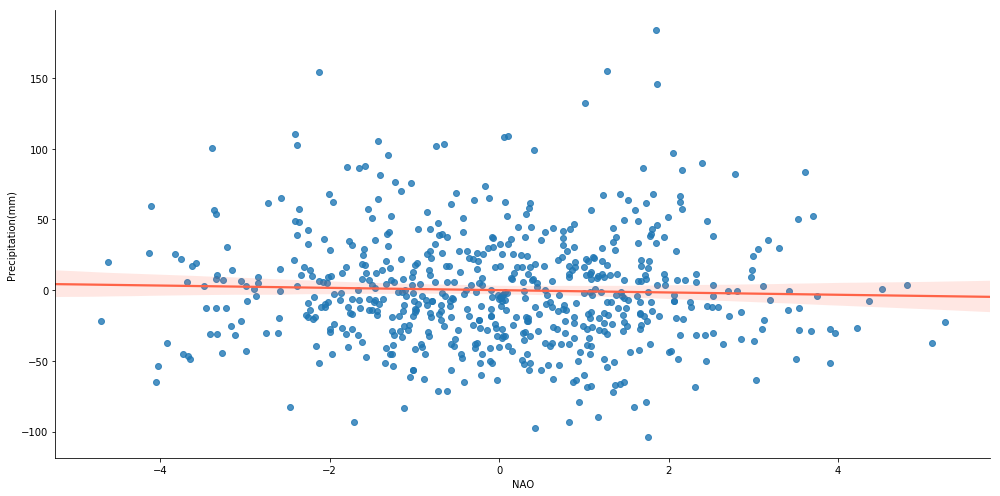

In [89]:
naoIdeamMix = pd.concat([naoAllTime.shift(-3),ideamEstacionReAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

## Niño 3.4 + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

The correlation matrix is:

 [[ 1.         -0.20106966]
 [-0.20106966  1.        ]]


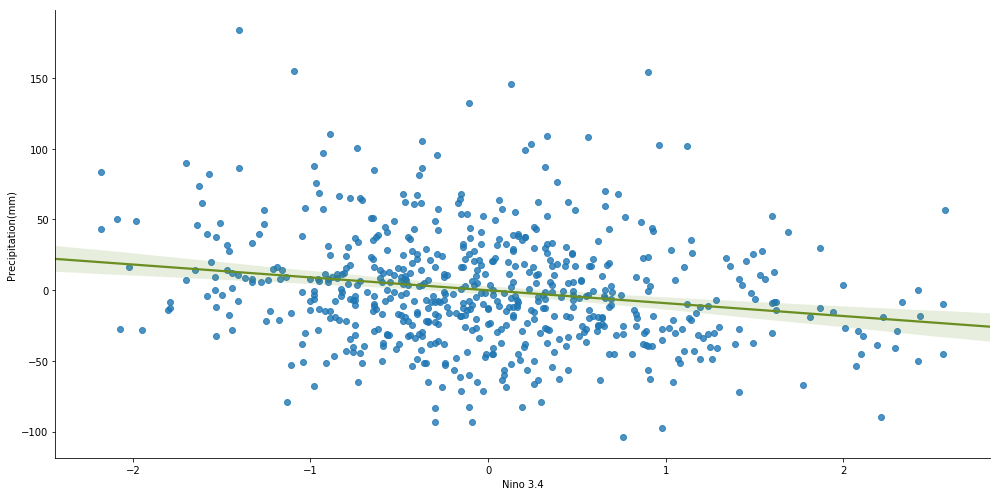

In [90]:
nino34IdeamMix = pd.concat([nino34AllTime,ideamEstacionReAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='blue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-1}$

The correlation matrix is:

 [[ 1.         -0.21261047]
 [-0.21261047  1.        ]]


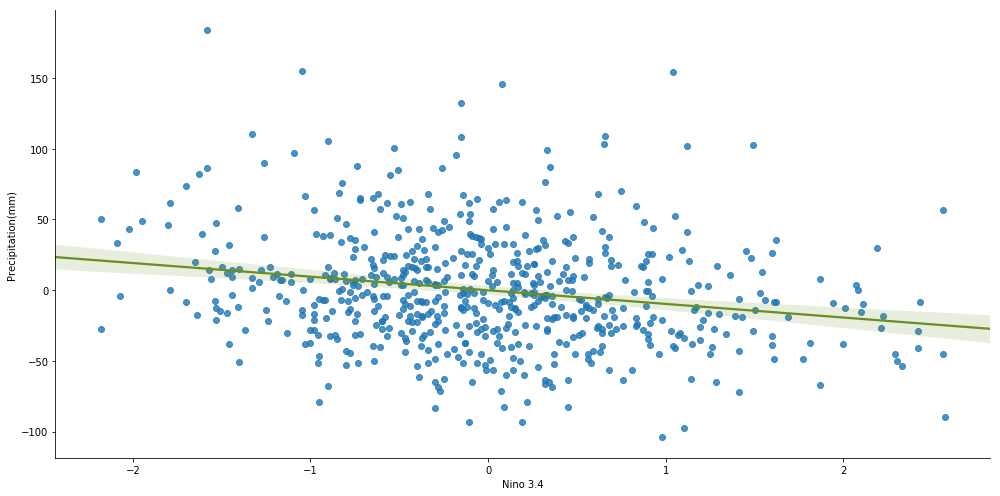

In [91]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-1),ideamEstacionReAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-2}$

The correlation matrix is:

 [[ 1.         -0.21067191]
 [-0.21067191  1.        ]]


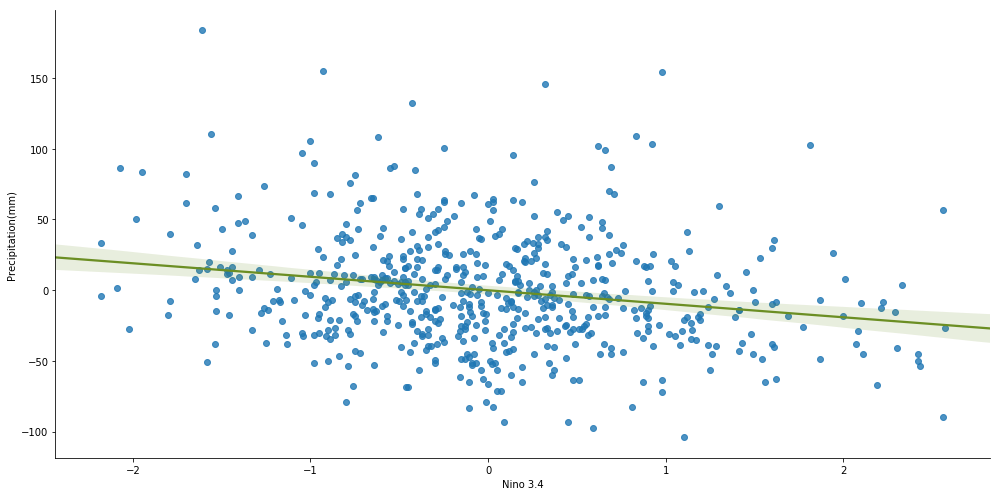

In [92]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-2),ideamEstacionReAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-3}$

The correlation matrix is:

 [[ 1.         -0.19894542]
 [-0.19894542  1.        ]]


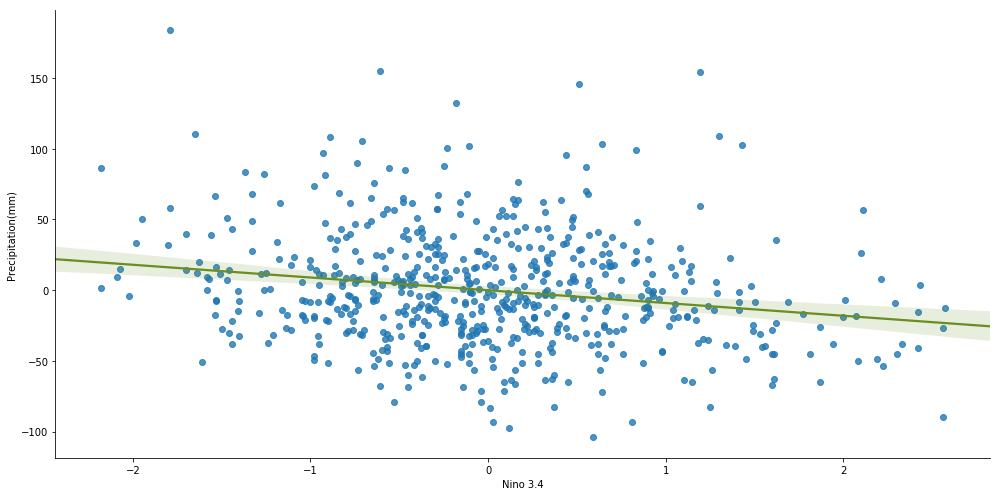

In [93]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-3),ideamEstacionReAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

# What about $\Delta 's$ ? 


 $ \Delta Precipitation_t$

Text(0.5,0,'$\\Delta Precipitation$')

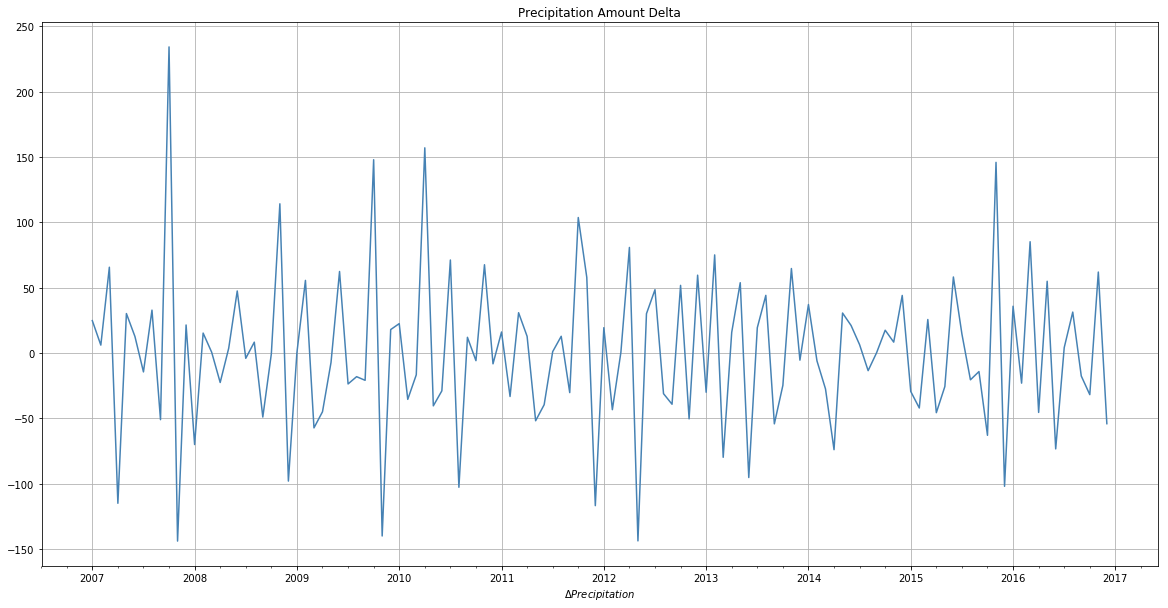

In [94]:
deltaPallTime = ideamEstacionReAllTime.diff() 
# Choose only last 5 years.
deltaPTime = pd.Series(deltaPallTime.iloc[-120:])
deltaPTimePlot=deltaPTime.plot(figsize=(20,10),title='Precipitation Amount Delta', grid=True,color='steelblue')
deltaPTimePlot.set_xlabel('Year')
deltaPTimePlot.set_xlabel('$\Delta Precipitation$')

 $ \Delta SOI_t$

Text(0,0.5,'$\\Delta SOI$')

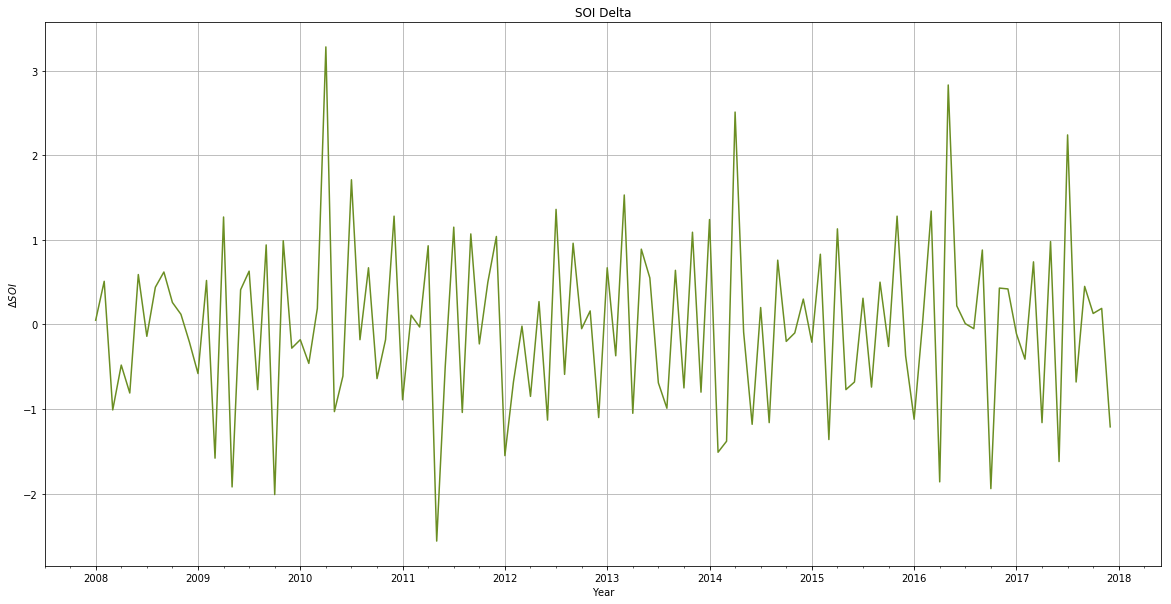

In [96]:
deltaSoiAllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaSoiTime = pd.Series(deltaSoiAllTime.iloc[-120:])
deltaSoiTimePlot=deltaSoiTime.plot(figsize=(20,10),title='SOI Delta', grid=True,color='olivedrab')
deltaSoiTimePlot.set_xlabel('Year')
deltaSoiTimePlot.set_ylabel('$\Delta SOI$')

 $ \Delta NAO_t$

Text(0,0.5,'$\\Delta NAO$')

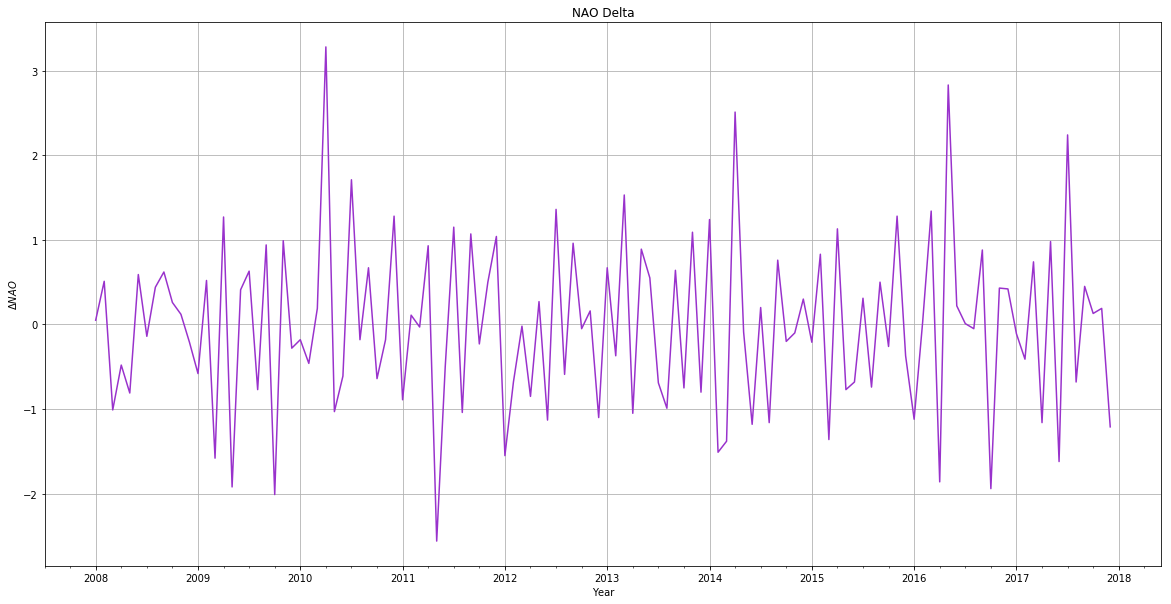

In [98]:
deltaNaoAllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaNaoTime = pd.Series(deltaNaoAllTime.iloc[-120:])
deltaNaoTimePlot=deltaNaoTime.plot(figsize=(20,10),title='NAO Delta', grid=True,color='darkorchid')
deltaNaoTimePlot.set_xlabel('Year')
deltaNaoTimePlot.set_ylabel('$\Delta NAO$')

 $ \Delta Niño3.4_t$

Text(0,0.5,'$\\Delta Nino34$')

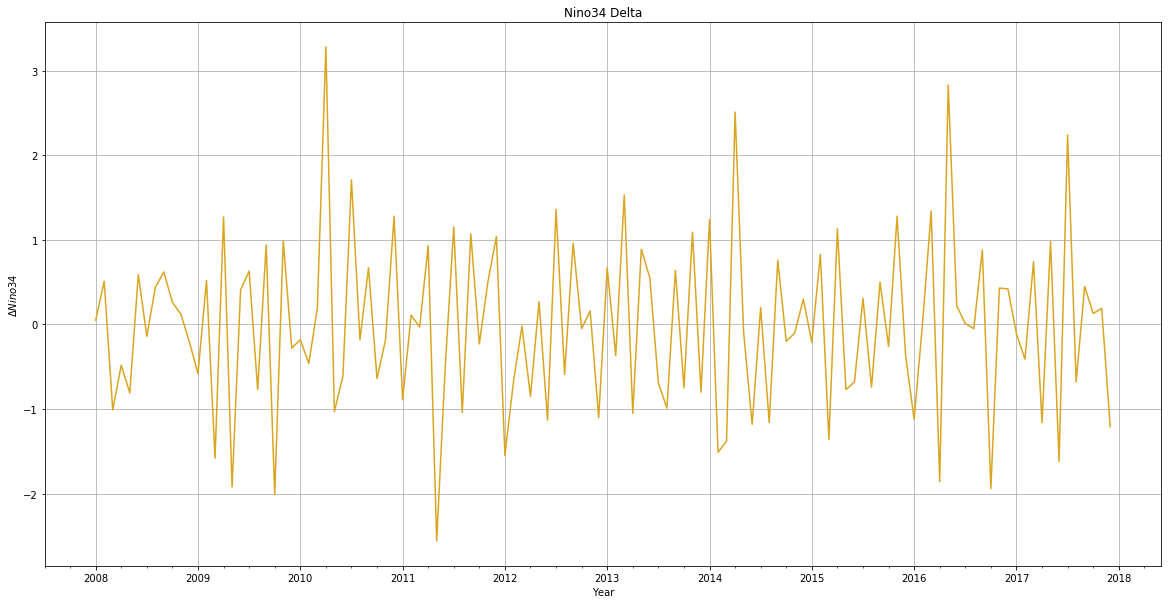

In [99]:
deltaNino34AllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaNino34Time = pd.Series(deltaNaoAllTime.iloc[-120:])
deltaNino34TimePlot=deltaNaoTime.plot(figsize=(20,10),title='Nino34 Delta', grid=True,color='goldenrod')
deltaNino34TimePlot.set_xlabel('Year')
deltaNino34TimePlot.set_ylabel('$\Delta Nino34$')

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t}$

The correlation matrix is:

 [[ 1.         -0.06942952]
 [-0.06942952  1.        ]]


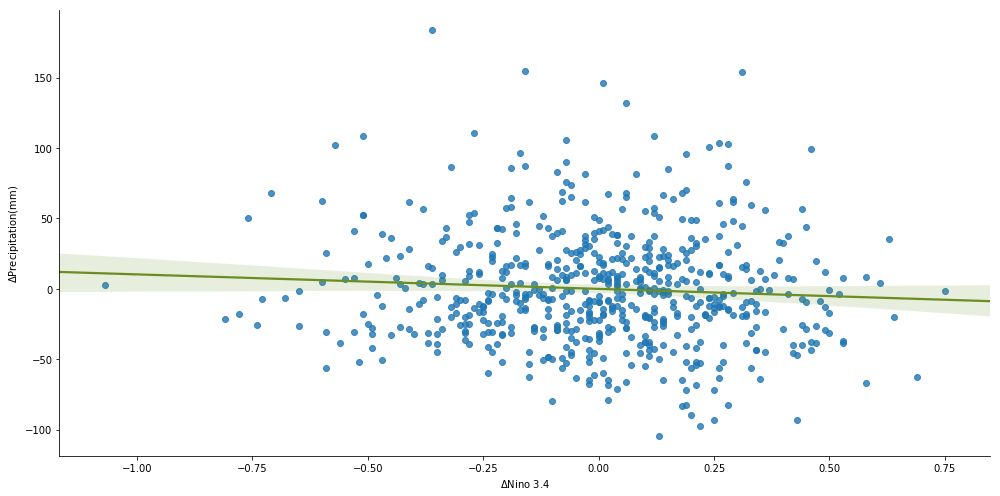

In [100]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.diff(),ideamEstacionReAllTime],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
#nino34IdeamMixDeltas.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='$\Delta$Nino 3.4',y='$\Delta$Precipitation(mm)',data=nino34IdeamMixDeltas,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMixDeltas['$\Delta$Nino 3.4'],nino34IdeamMixDeltas['$\Delta$Precipitation(mm)']))

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t-1}$

The correlation matrix is:

 [[ 1.        -0.0354092]
 [-0.0354092  1.       ]]


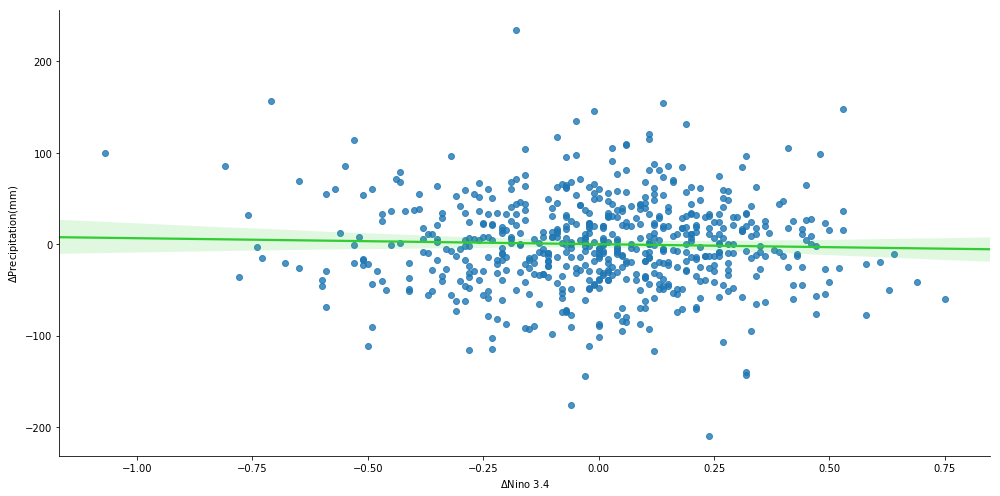

In [101]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.shift(-1).diff(),ideamEstacionReAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
#nino34IdeamMixDeltas.plot.scatter(0,1,c='limegreen',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='$\Delta$Nino 3.4',y='$\Delta$Precipitation(mm)',data=nino34IdeamMixDeltas,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'limegreen'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMixDeltas['$\Delta$Nino 3.4'],nino34IdeamMixDeltas['$\Delta$Precipitation(mm)']))

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t-2}$

The correlation matrix is:

 [[ 1.         -0.02555489]
 [-0.02555489  1.        ]]


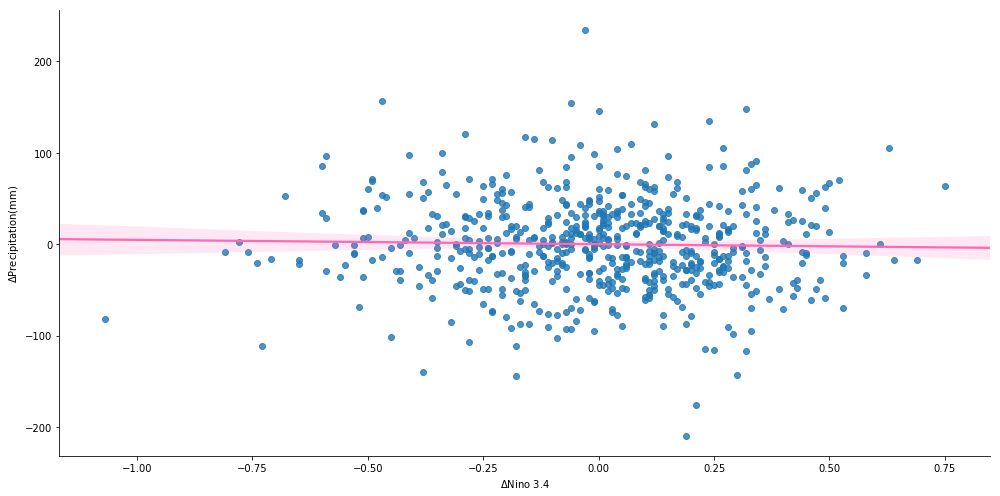

In [102]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.shift(-2).diff(),ideamEstacionReAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
#nino34IdeamMixDeltas.plot.scatter(0,1,c='hotpink',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='$\Delta$Nino 3.4',y='$\Delta$Precipitation(mm)',data=nino34IdeamMixDeltas,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'hotpink'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMixDeltas['$\Delta$Nino 3.4'],nino34IdeamMixDeltas['$\Delta$Precipitation(mm)']))

# Dispersion Plots 


## SOI + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

The correlation matrix is:

  [[1.         0.19806025]
 [0.19806025 1.        ]]


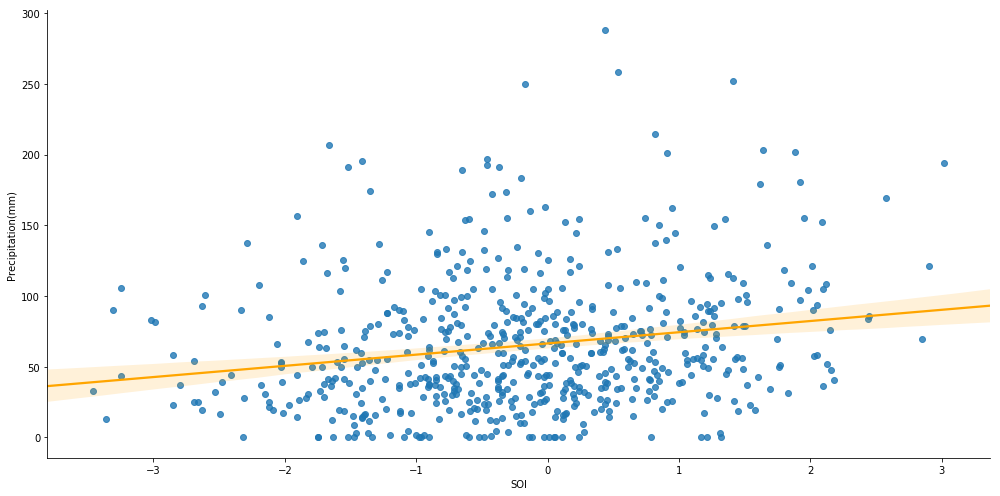

In [72]:
import seaborn as sns


soiIdeamMix = pd.concat([soiAllTime,ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-1}$

The correlation matrix is:

  [[1.         0.22079077]
 [0.22079077 1.        ]]


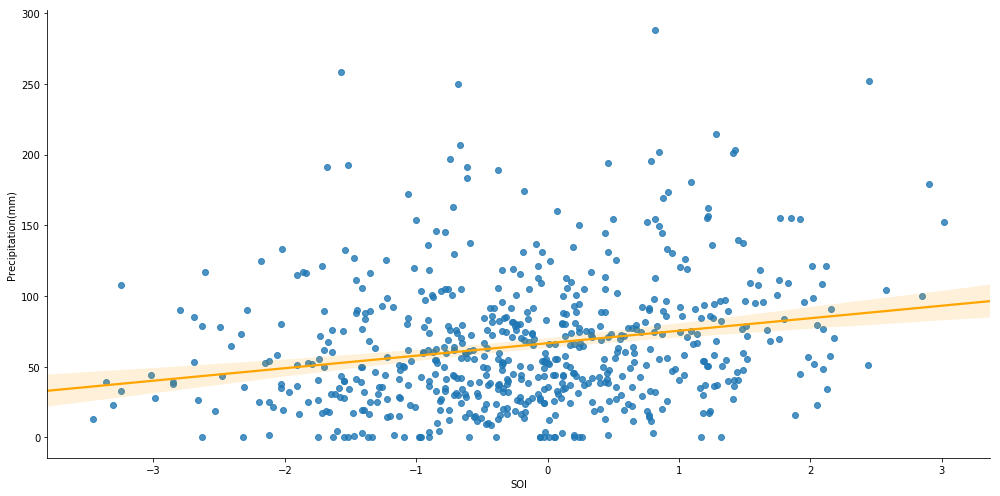

In [71]:
soiIdeamMix = pd.concat([soiAllTime.shift(-1),ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-2}$

The correlation matrix is:

  [[1.         0.19785609]
 [0.19785609 1.        ]]


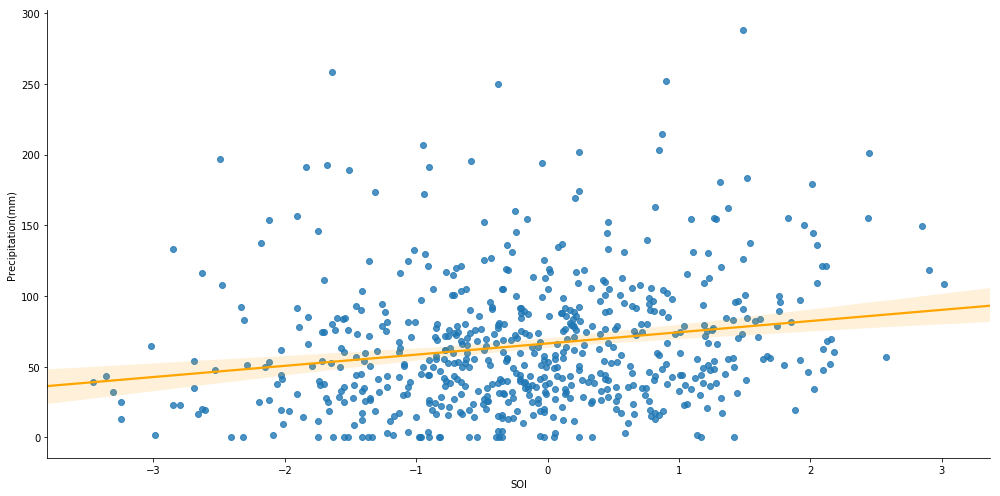

In [70]:
soiIdeamMix = pd.concat([soiAllTime.shift(-2),ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2 ,line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-3}$

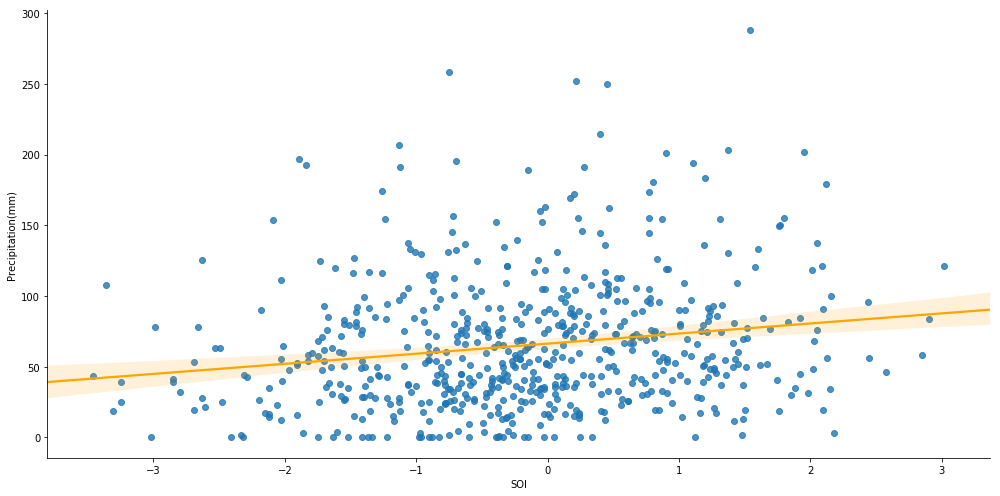

In [52]:
soiIdeamMix = pd.concat([soiAllTime.shift(-3),ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
#soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='SOI',y='Precipitation(mm)',data=soiIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'orange'}) 
print('The correlation matrix is:\n\n ', np.corrcoef(soiIdeamMix['SOI'],soiIdeamMix['Precipitation(mm)']))

## NAO + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

The correlation matrix is:

 [[ 1.         -0.08590236]
 [-0.08590236  1.        ]]


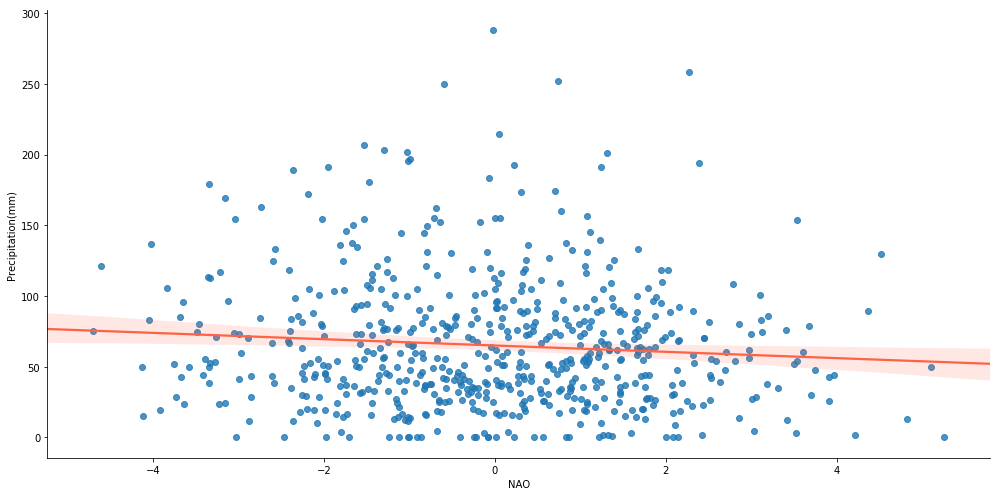

In [67]:
naoIdeamMix = pd.concat([naoAllTime,ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-1}$

The correlation matrix is:

 [[1.         0.00540511]
 [0.00540511 1.        ]]


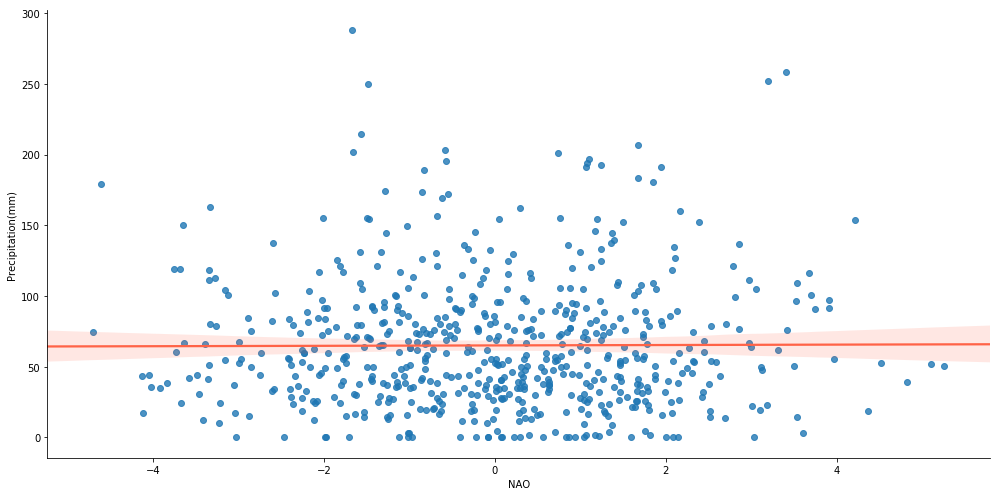

In [66]:
naoIdeamMix = pd.concat([naoAllTime.shift(-1),ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-2}$

The correlation matrix is:

 [[1.         0.03342787]
 [0.03342787 1.        ]]


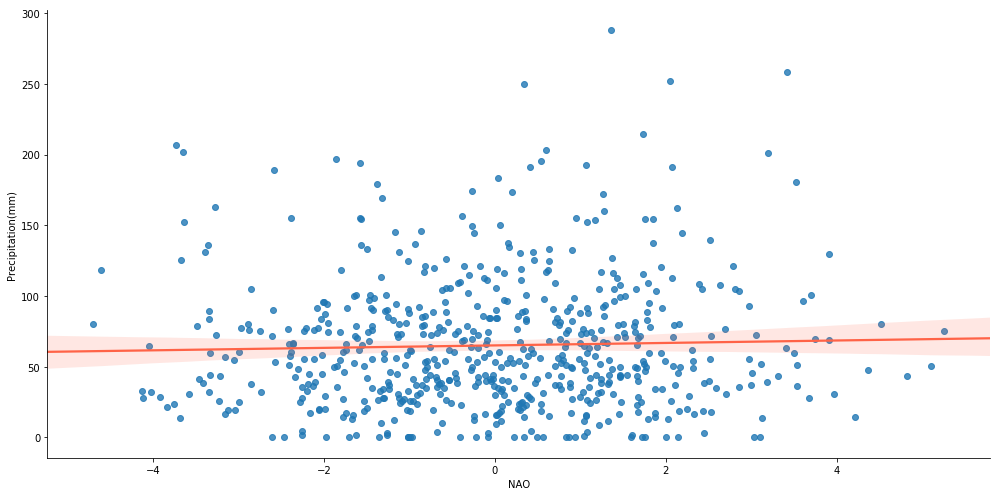

In [68]:
naoIdeamMix = pd.concat([naoAllTime.shift(-2),ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-3}$

The correlation matrix is:

 [[1.         0.03499728]
 [0.03499728 1.        ]]


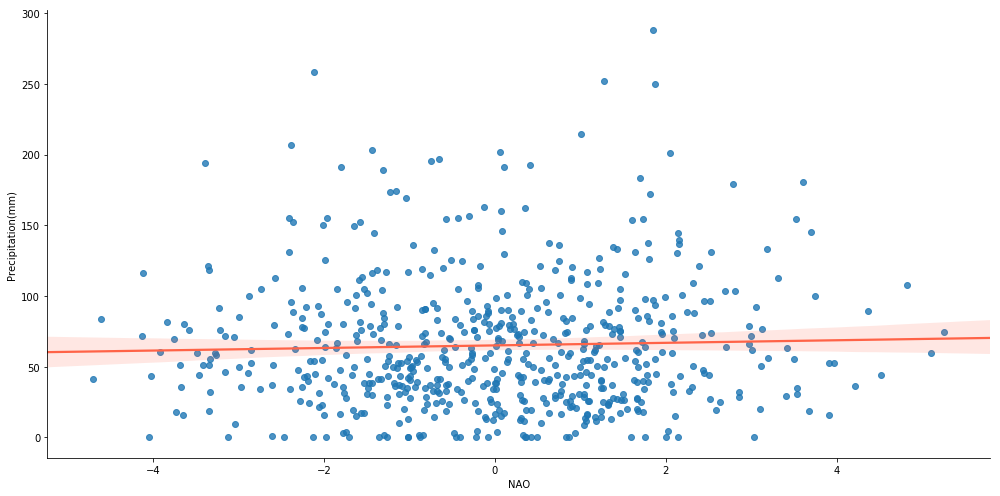

In [69]:
naoIdeamMix = pd.concat([naoAllTime.shift(-3),ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
#naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='NAO',y='Precipitation(mm)',data=naoIdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'tomato'}) 
print('The correlation matrix is:\n\n',np.corrcoef(naoIdeamMix['NAO'],naoIdeamMix['Precipitation(mm)']))

## Niño 3.4 + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

The correlation matrix is:

 [[ 1.         -0.17060282]
 [-0.17060282  1.        ]]


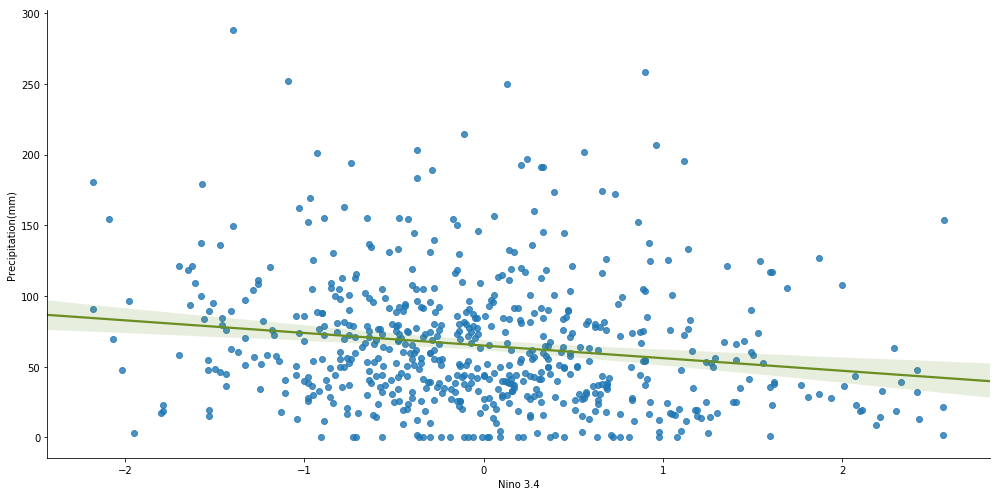

In [74]:
nino34IdeamMix = pd.concat([nino34AllTime,ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='blue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-1}$

The correlation matrix is:

 [[ 1.         -0.17698192]
 [-0.17698192  1.        ]]


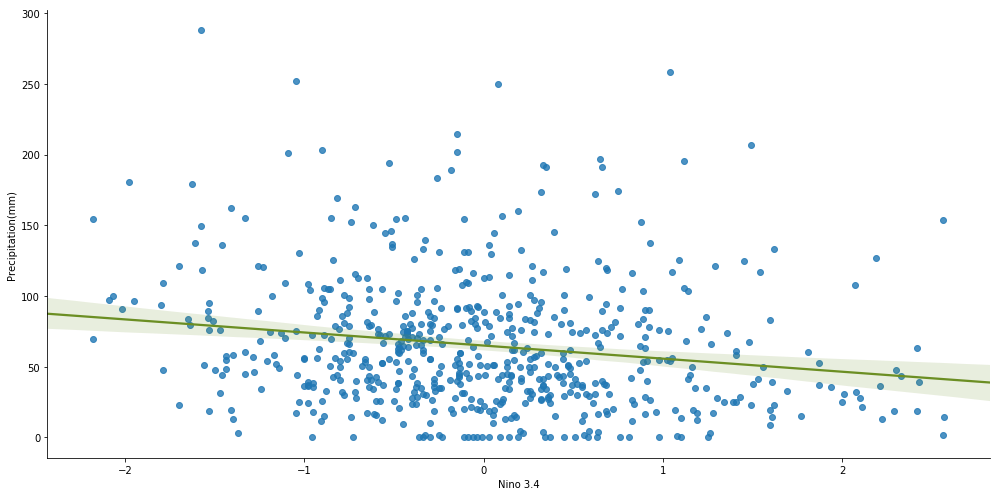

In [75]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-1),ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-2}$

The correlation matrix is:

 [[ 1.         -0.17902926]
 [-0.17902926  1.        ]]


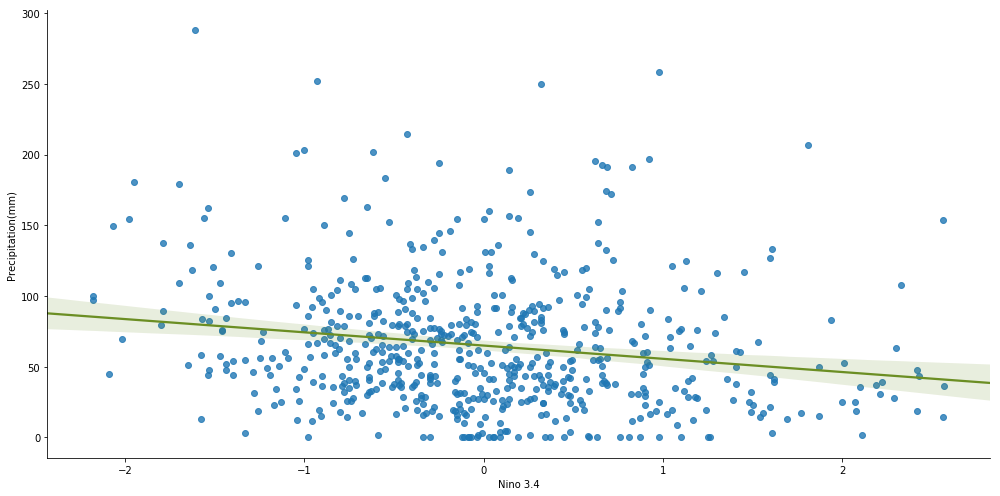

In [76]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-2),ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

 $ Precipitation_t$ v $Index_{t-3}$

The correlation matrix is:

 [[ 1.         -0.17512255]
 [-0.17512255  1.        ]]


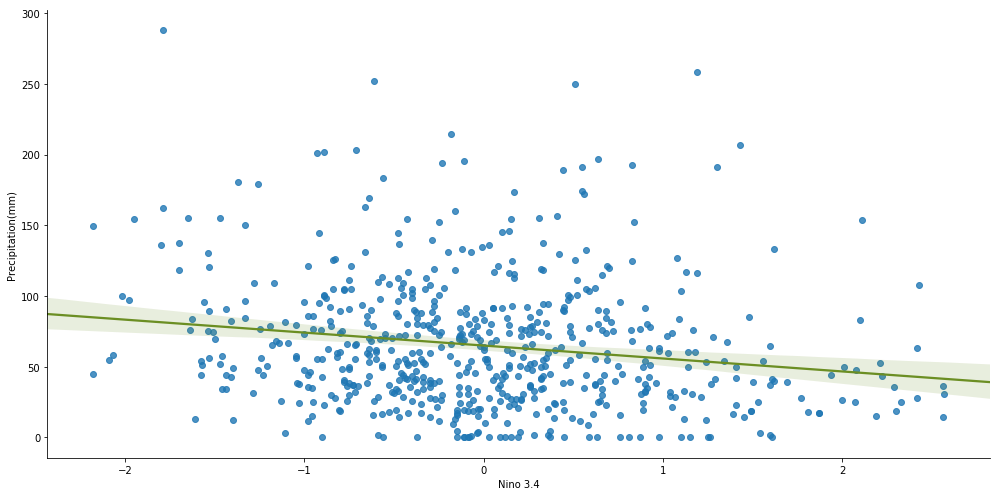

In [77]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-3),ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
#nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

# What about $\Delta 's$ ? 


 $ \Delta Precipitation_t$

Text(0.5,0,'$\\Delta Precipitation$')

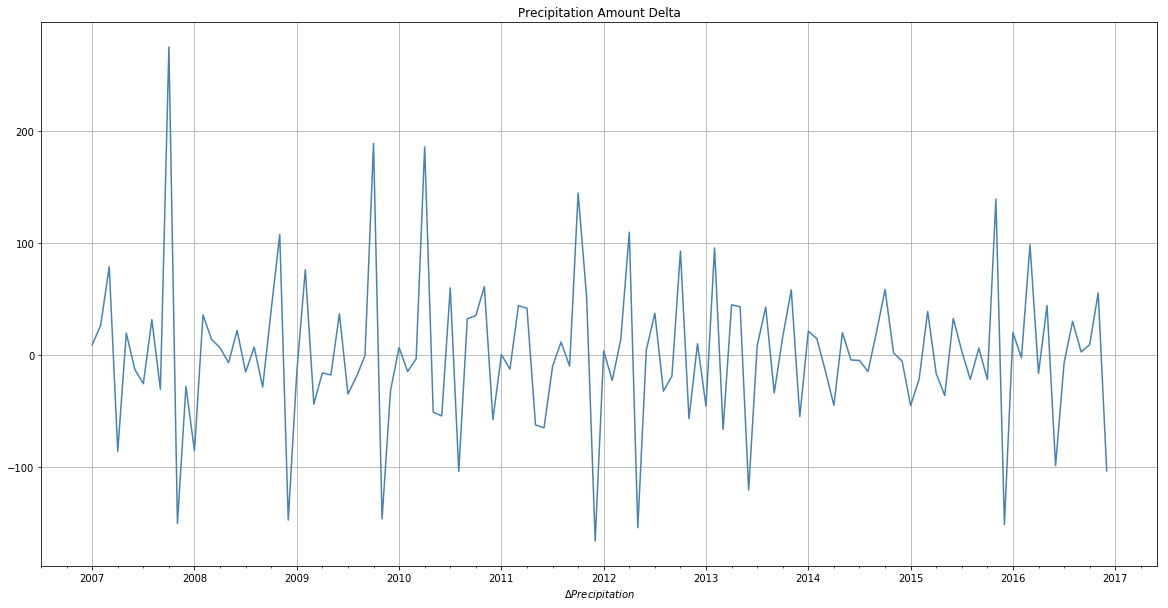

In [96]:
deltaPallTime = ideamEstacionAllTime.diff() 
# Choose only last 5 years.
deltaPTime = pd.Series(deltaPallTime.iloc[-120:])
deltaPTimePlot=deltaPTime.plot(figsize=(20,10),title='Precipitation Amount Delta', grid=True,color='steelblue')
deltaPTimePlot.set_xlabel('Year')
deltaPTimePlot.set_xlabel('$\Delta Precipitation$')

 $ \Delta SOI_t$

Text(0,0.5,'$\\Delta SOI$')

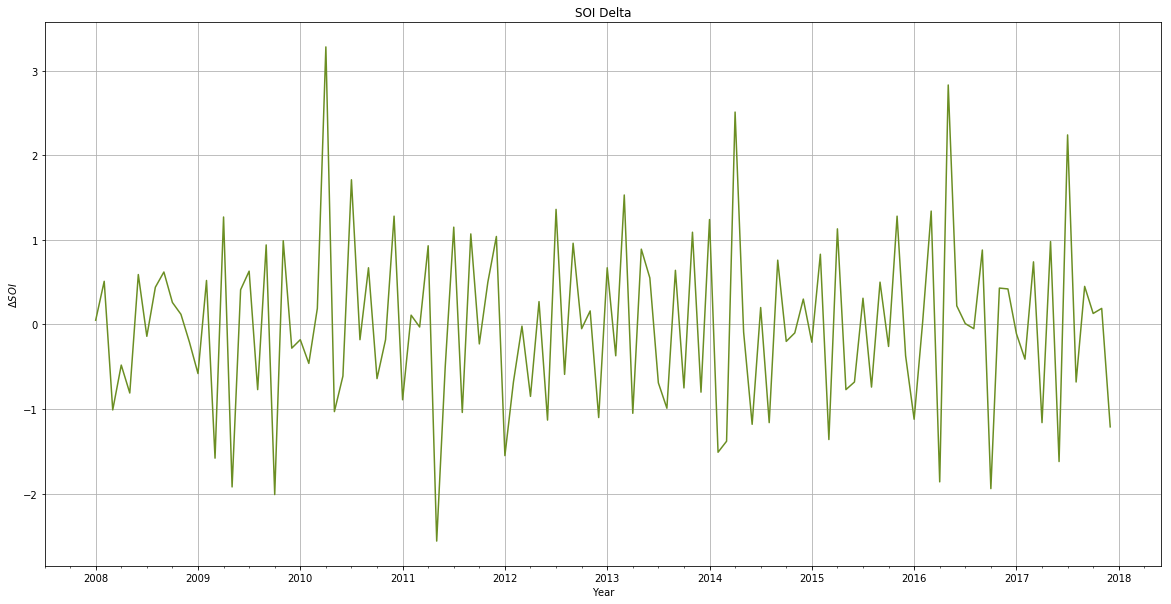

In [97]:
deltaSoiAllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaSoiTime = pd.Series(deltaSoiAllTime.iloc[-120:])
deltaSoiTimePlot=deltaSoiTime.plot(figsize=(20,10),title='SOI Delta', grid=True,color='olivedrab')
deltaSoiTimePlot.set_xlabel('Year')
deltaSoiTimePlot.set_ylabel('$\Delta SOI$')

 $ \Delta NAO_t$

Text(0,0.5,'$\\Delta NAO$')

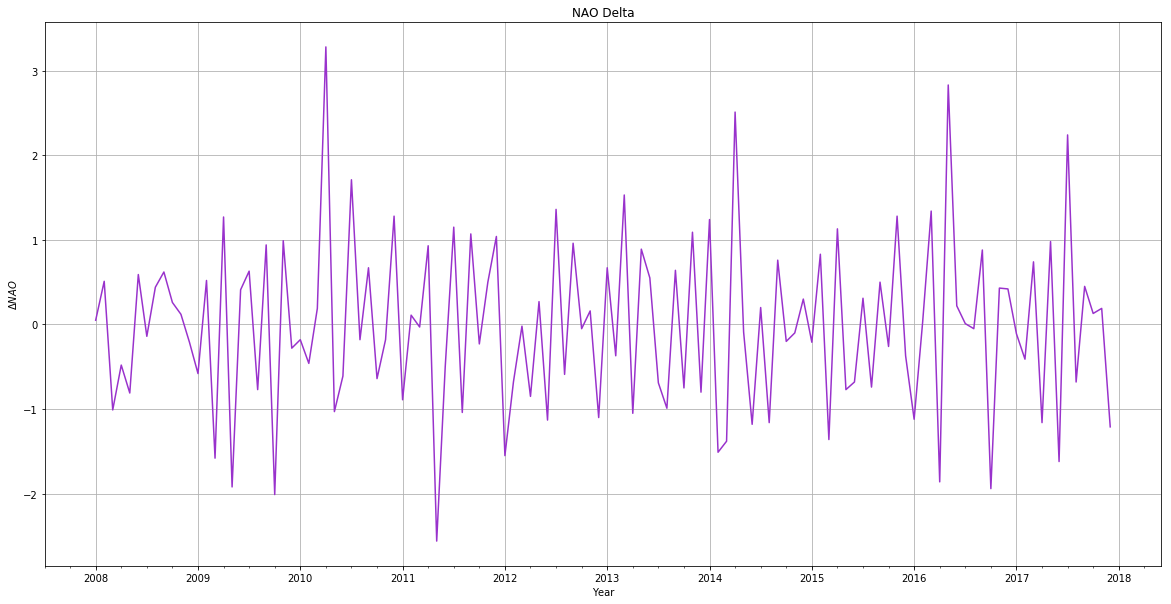

In [98]:
deltaNaoAllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaNaoTime = pd.Series(deltaNaoAllTime.iloc[-120:])
deltaNaoTimePlot=deltaNaoTime.plot(figsize=(20,10),title='NAO Delta', grid=True,color='darkorchid')
deltaNaoTimePlot.set_xlabel('Year')
deltaNaoTimePlot.set_ylabel('$\Delta NAO$')

 $ \Delta Niño3.4_t$

Text(0,0.5,'$\\Delta Nino34$')

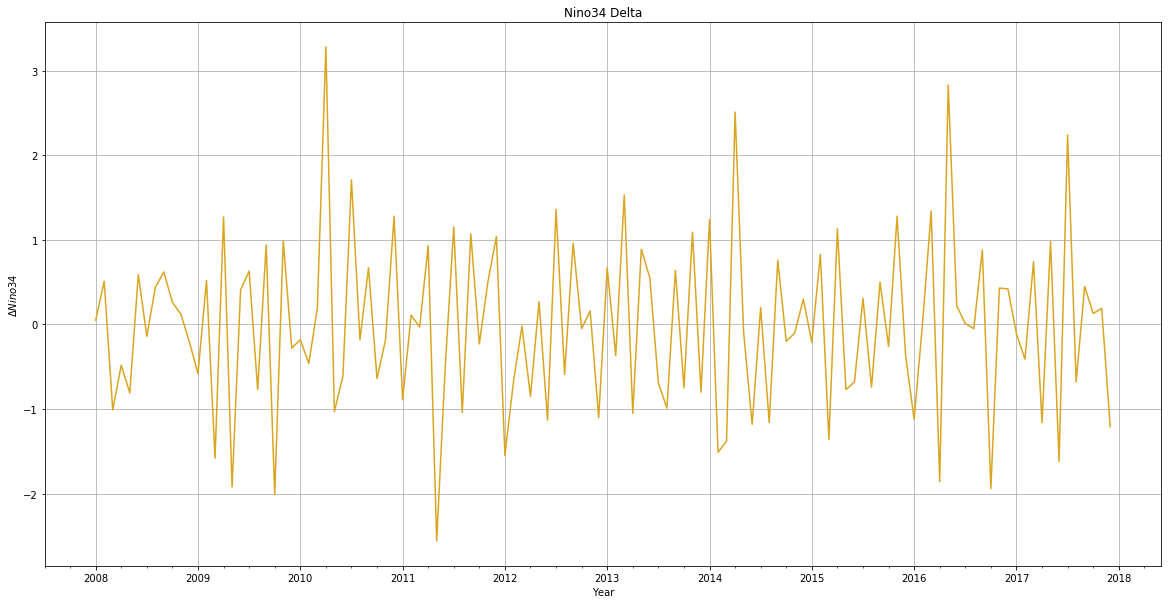

In [99]:
deltaNino34AllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaNino34Time = pd.Series(deltaNaoAllTime.iloc[-120:])
deltaNino34TimePlot=deltaNaoTime.plot(figsize=(20,10),title='Nino34 Delta', grid=True,color='goldenrod')
deltaNino34TimePlot.set_xlabel('Year')
deltaNino34TimePlot.set_ylabel('$\Delta Nino34$')

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t}$

The correlation matrix is:

 [[ 1.         -0.03865766]
 [-0.03865766  1.        ]]


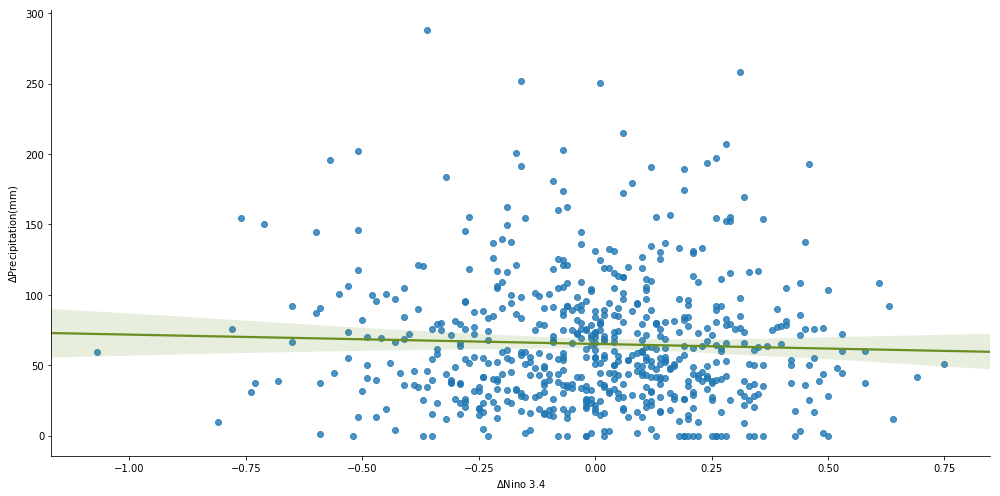

In [79]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.diff(),ideamEstacionAllTime],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
#nino34IdeamMixDeltas.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='$\Delta$Nino 3.4',y='$\Delta$Precipitation(mm)',data=nino34IdeamMixDeltas,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'olivedrab'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMixDeltas['$\Delta$Nino 3.4'],nino34IdeamMixDeltas['$\Delta$Precipitation(mm)']))

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t-1}$

The correlation matrix is:

 [[ 1.        -0.0115211]
 [-0.0115211  1.       ]]


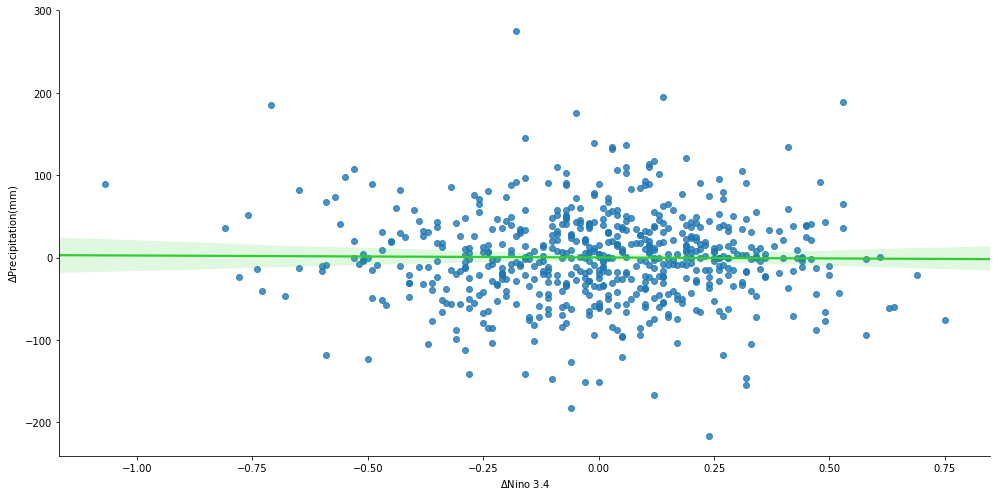

In [80]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.shift(-1).diff(),ideamEstacionAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
#nino34IdeamMixDeltas.plot.scatter(0,1,c='limegreen',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='$\Delta$Nino 3.4',y='$\Delta$Precipitation(mm)',data=nino34IdeamMixDeltas,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'limegreen'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMixDeltas['$\Delta$Nino 3.4'],nino34IdeamMixDeltas['$\Delta$Precipitation(mm)']))

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t-2}$

The correlation matrix is:

 [[ 1.         -0.01577488]
 [-0.01577488  1.        ]]


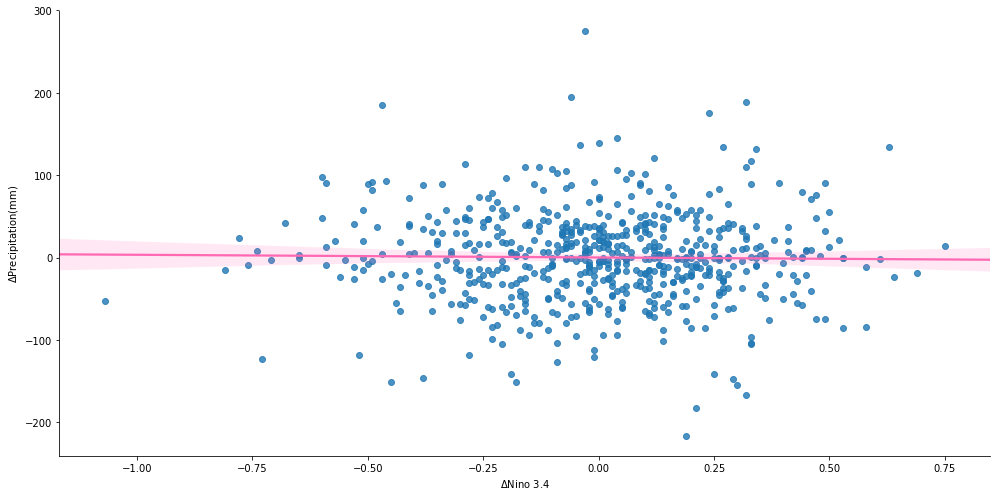

In [81]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.shift(-2).diff(),ideamEstacionAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
#nino34IdeamMixDeltas.plot.scatter(0,1,c='hotpink',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)
sns.lmplot(x='$\Delta$Nino 3.4',y='$\Delta$Precipitation(mm)',data=nino34IdeamMixDeltas,fit_reg=True, size=7, aspect= 2, line_kws={'color': 'hotpink'}) 
print('The correlation matrix is:\n\n',np.corrcoef(nino34IdeamMixDeltas['$\Delta$Nino 3.4'],nino34IdeamMixDeltas['$\Delta$Precipitation(mm)']))

# Box plots

### $Nino \  3.4$

          ############################################  NIÑO 3.4 ############################################


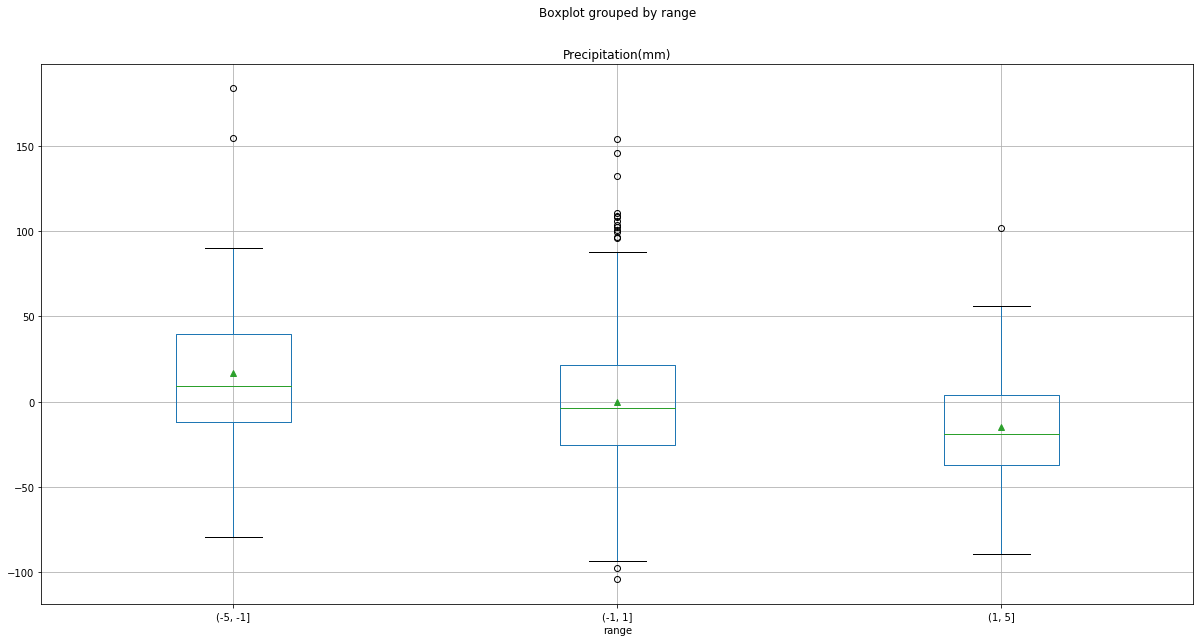

In [119]:
#Set up bins in order to create Classes

bin = [-5,-1,1,5]

# Choose a dataset. 

############  Without Removing month averages ############3 
nino34IdeamMix = pd.concat([nino34AllTime.shift(-0),ideamEstacionAllTime],axis=1)

############  REMOVING month averages ############3 
nino34IdeamMix = pd.concat([nino34AllTime.shift(-0),ideamEstacionReAllTime],axis=1)


nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()

# use pd.cut function can attribute the values into its specific bins
category = pd.cut(nino34IdeamMix['Nino 3.4'],bin)

category = category.to_frame()
category.columns = ['range']

#concatenate age and its bin
nino34IdeamMix_New = pd.concat([nino34IdeamMix,category],axis = 1)

nino34IdeamMix_New.boxplot(column='Precipitation(mm)',by='range', figsize=(20,10),grid=True, showmeans= True)

print( '          ############################################  NIÑO 3.4 ############################################')

### $SOI$

          ############################################  SOI ############################################


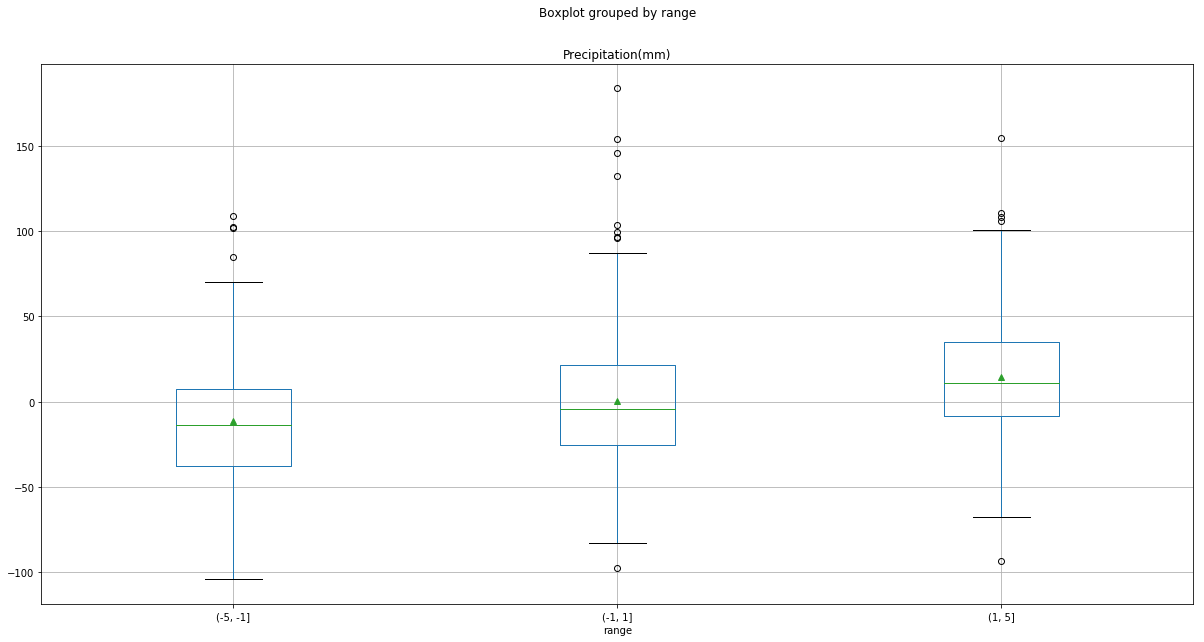

In [121]:
#Set up bins in order to create Classes

bin = [-5,-1,1,5]

# Choose a dataset. 

############  Without Removing month averages ############3 
soiIdeamMix = pd.concat([soiAllTime.shift(-0),ideamEstacionAllTime],axis=1)

############  REMOVING month averages ############3 
soiIdeamMix = pd.concat([soiAllTime.shift(-0),ideamEstacionReAllTime],axis=1)


soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()

# use pd.cut function can attribute the values into its specific bins
category = pd.cut(soiIdeamMix['SOI'],bin)

category = category.to_frame()
category.columns = ['range']

#concatenate index and its bin
soiIdeamMix_New = pd.concat([soiIdeamMix,category],axis = 1)

soiIdeamMix_New.boxplot(column='Precipitation(mm)',by='range', figsize=(20,10),grid=True, showmeans= True)

print( '          ############################################  SOI ############################################')

### $NAO$

          ############################################  NAO ############################################


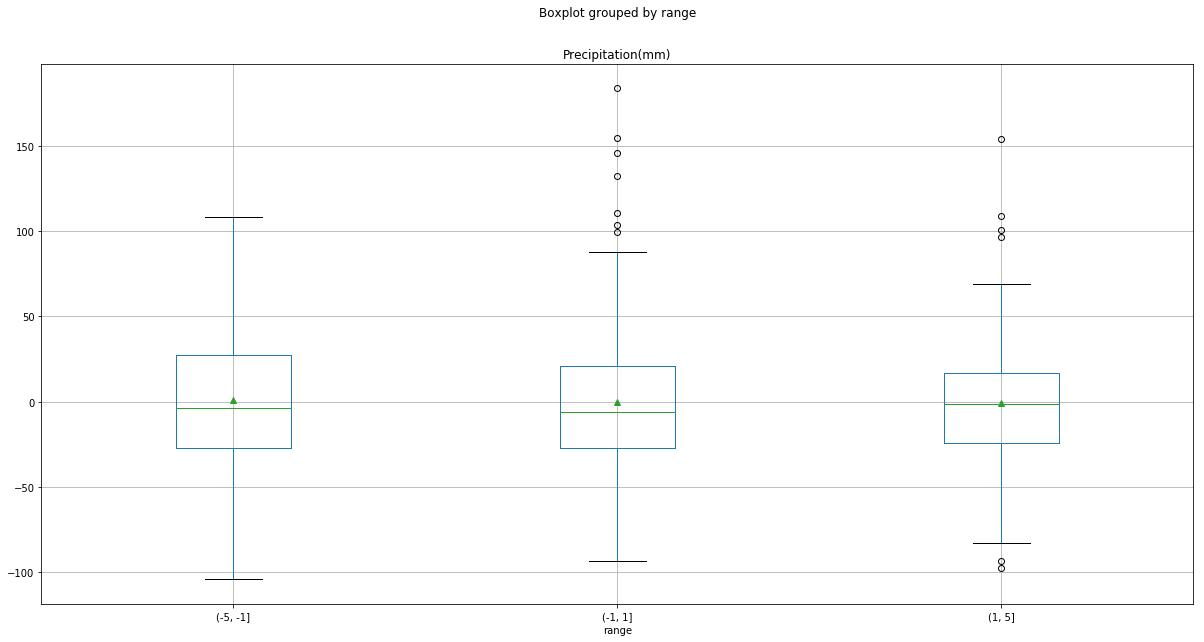

In [122]:
#Set up bins in order to create Classes

bin = [-5,-1,1,5]

# Choose a dataset. 

############  Without Removing month averages ############3 
naoIdeamMix = pd.concat([naoAllTime.shift(-0),ideamEstacionAllTime],axis=1)

############  REMOVING month averages ############3 
naoIdeamMix = pd.concat([naoAllTime.shift(-0),ideamEstacionReAllTime],axis=1)


naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()

# use pd.cut function can attribute the values into its specific bins
category = pd.cut(naoIdeamMix['NAO'],bin)

category = category.to_frame()
category.columns = ['range']

#concatenate index and its bin
naoIdeamMix_New = pd.concat([naoIdeamMix,category],axis = 1)

naoIdeamMix_New.boxplot(column='Precipitation(mm)',by='range', figsize=(20,10),grid=True, showmeans= True)

print( '          ############################################  NAO ############################################')